# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB               
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB                   
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import math
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression      
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

from itertools import combinations
import itertools
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 2. Data Pre-Processing

## 2.1. Import dataset

In [2]:
data= pd.read_csv('/kaggle/input/agriculture-dataset-karnataka/data_season.csv')
data

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif
...,...,...,...,...,...,...,...,...,...,...,...,...
3153,2013,Davangere,46990,3296.0,27.0,NaN,Drip,107809.0,53.5,Coconut,51239,Rabi
3154,2014,Davangere,103,3296.0,27.0,NaN,Drip,1132.0,52.5,Coconut,216396,Rabi
3155,2015,Davangere,8239,3550.0,27.0,NaN,Drip,23960.0,56.0,Coconut,2644,Rabi
3156,2016,Davangere,44563,3550.0,27.0,NaN,Drip,126487.0,57.0,Coconut,44235,Rabi


## 2.2. Convert to dataframe

In [3]:
df = pd.DataFrame(data)
df

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif
...,...,...,...,...,...,...,...,...,...,...,...,...
3153,2013,Davangere,46990,3296.0,27.0,NaN,Drip,107809.0,53.5,Coconut,51239,Rabi
3154,2014,Davangere,103,3296.0,27.0,NaN,Drip,1132.0,52.5,Coconut,216396,Rabi
3155,2015,Davangere,8239,3550.0,27.0,NaN,Drip,23960.0,56.0,Coconut,2644,Rabi
3156,2016,Davangere,44563,3550.0,27.0,NaN,Drip,126487.0,57.0,Coconut,44235,Rabi


## 2.3. Get data information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3158 non-null   int64  
 1   Location     3158 non-null   object 
 2   Area         3158 non-null   int64  
 3   Rainfall     3158 non-null   float64
 4   Temperature  3158 non-null   float64
 5   Soil type    3100 non-null   object 
 6   Irrigation   3158 non-null   object 
 7   yeilds       3158 non-null   float64
 8   Humidity     3158 non-null   float64
 9   Crops        3158 non-null   object 
 10  price        3158 non-null   int64  
 11  Season       3158 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 296.2+ KB


## 2.4. Data description

In [5]:
desc = df.describe()
styled_desc = desc.style.background_gradient(cmap='Reds')
styled_desc

,Year,Area,Rainfall,Temperature,yeilds,Humidity,price
count,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000
mean,2009.929702,9329.913553,2813.126662,65.893699,23258.976916,55.582331,86271.279291
std,5.100895,15180.465396,1163.829953,60.814037,58228.985033,2.469773,94123.160706
min,2004.000000,1.000000,233.000000,26.800000,2.000000,50.000000,637.000000
25%,2004.000000,153.000000,2903.100000,27.000000,393.000000,54.000000,2644.000000
50%,2010.000000,2127.000000,3296.000000,38.000000,2783.000000,56.000000,45186.000000
75%,2015.000000,10910.000000,3550.000000,43.000000,6589.000000,57.000000,203317.000000
max,2019.000000,52119.000000,3729.800000,222.000000,623687.000000,60.000000,249978.000000


## 2.5. Check hidden characters in column's name

In [6]:
for col in df.columns:
    print(repr(col))

'Year'
'Location'
'Area'
'Rainfall'
'Temperature'
'Soil type'
'Irrigation'
'yeilds'
'Humidity'
'Crops'
'price'
'Season'


## 2.6. Check duplicates

In [7]:
duplicates = df.duplicated()
if duplicates.any():
    print ("Duplicates exist")
else:
    print("Duplicates do not exist")

Duplicates do not exist


## 2.7. Check number of unique values

In [8]:
df.nunique()

Year            16
Location        11
Area           156
Rainfall        21
Temperature    106
Soil type       27
Irrigation       3
yeilds         162
Humidity        19
Crops           13
price           24
Season           3
dtype: int64

In [9]:
datatype = pd.DataFrame(df.dtypes, columns=['Data Types'])
Null_Count = pd.DataFrame(df.isnull().sum(), columns=['Null Count'])
data_table = pd.concat([datatype, Null_Count], axis='columns')
data_table

,Data Types,Null Count
Year,int64,0
Location,object,0
Area,int64,0
Rainfall,float64,0
Temperature,float64,0
Soil type,object,58
Irrigation,object,0
yeilds,float64,0
Humidity,float64,0
Crops,object,0


## 2.8. Unique values for categorical variables

In [10]:
Category = ["Location","Soil type","Irrigation", "Crops", "Season" ]
for i in Category: 
    print(i, "=", df[i].unique().tolist())

Location = ['Mangalore', 'Kodagu', 'Kasaragodu', 'Raichur', 'Gulbarga', 'Madikeri', 'Hassan', 'Mysuru', 'Chikmangaluru', 'Bangalore', 'Davangere']
Soil type = ['Alluvial', 'Red', 'Black', 'Loam', 'Sandy loam ', 'Red laterite', 'Black cotton', 'Sandy', 'Laterite', 'Teelah', 'Clay', 'Clay loam', 'Arid and Desert', 'loamy sand', 'River basins', 'Light sandy', 'Heavy clay', 'Dry sandy ', 'Heavy cotton', 'Sandy loam', 'Sandy clay loam', 'Well drained', 'Drained loam', 'Red ', 'Gravelly sand', 'Medium textured clay', 'Medium textured ', nan]
Irrigation = ['Drip', 'Basin', 'Spray']
Crops = ['Coconut', 'Cocoa', 'Coffee', 'Cardamum', 'Pepper', 'Arecanut', 'Ginger', 'Tea', 'Paddy', 'Groundnut', 'Blackgram', 'Cashew', 'Cotton']
Season = ['Kharif', 'Rabi', 'Zaid']


## 2.9. Missing values

In [11]:
df[df.isna().any(axis=1)]

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
3100,2009,Bangalore,1468,3360.0,178.0,NaN,Spray,4015.0,52.5,Paddy,45186,Zaid
3101,2010,Bangalore,568,3360.0,179.0,NaN,Spray,4279.0,56.0,Paddy,238542,Zaid
3102,2011,Bangalore,407,3605.4,180.0,NaN,Spray,4167.0,57.0,Paddy,1516,Zaid
3103,2012,Bangalore,177,3605.4,181.0,NaN,Spray,4479.0,57.5,Paddy,200000,Zaid
3104,2013,Bangalore,51,3605.4,182.0,NaN,Spray,3699.0,57.0,Groundnut,4847,Zaid
3105,2014,Bangalore,173,3512.4,183.0,NaN,Spray,4904.0,55.0,Groundnut,51239,Zaid
3106,2015,Bangalore,201,3512.4,184.0,NaN,Spray,2821.0,56.0,Groundnut,216396,Zaid
3107,2016,Bangalore,206,3512.4,185.0,NaN,Spray,3472.0,54.0,Groundnut,2644,Zaid
3108,2017,Bangalore,243,3296.0,186.0,NaN,Spray,3647.0,58.0,Groundnut,44235,Zaid
3109,2016,Bangalore,123,3296.0,187.0,NaN,Spray,393.0,58.0,Groundnut,203317,Zaid


## 2.10. Drop missing values

In [12]:
df1 = df.dropna()
df1

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif
...,...,...,...,...,...,...,...,...,...,...,...,...
3095,2004,Raichur,2059,3729.8,173.0,Black,Spray,4247.0,58.5,Paddy,216396,Zaid
3096,2005,Raichur,2050,2746.2,174.0,Black,Spray,3290.0,59.5,Paddy,2644,Zaid
3097,2006,Raichur,1865,2746.2,175.0,Black,Spray,3138.0,55.0,Paddy,44235,Zaid
3098,2007,Raichur,1841,2746.2,176.0,Black,Spray,3423.0,53.0,Paddy,203317,Zaid


# 3. Visualization

## 3.1. Count the number of categorical features

In [13]:
counts= {}

for i in df1[["Location","Soil type","Irrigation", "Crops", "Season"]]: 
    counts[i] = df1[i].value_counts()
    print("Value counts for {} \n".format(counts[i]))  

Value counts for Location
Hassan           798
Gulbarga         504
Mangalore        342
Chikmangaluru    340
Madikeri         240
Kasaragodu       231
Raichur          231
Mysuru           222
Kodagu           192
Name: count, dtype: int64 

Value counts for Soil type
Alluvial                459
Loam                    281
Laterite                281
Sandy loam              265
Black                   259
Sandy loam              216
Clay loam               196
Sandy                   189
Red                     170
Clay                    105
Dry sandy               100
Drained loam             85
Arid and Desert          66
Red                      64
Heavy clay               40
Gravelly sand            40
Well drained             39
River basins             30
Heavy cotton             30
loamy sand               29
Light sandy              29
Sandy clay loam          25
Black cotton             25
Red laterite             25
Medium textured          21
Medium textured clay     20
Te

## 3.2. Plot Pie chart for each categorical variable

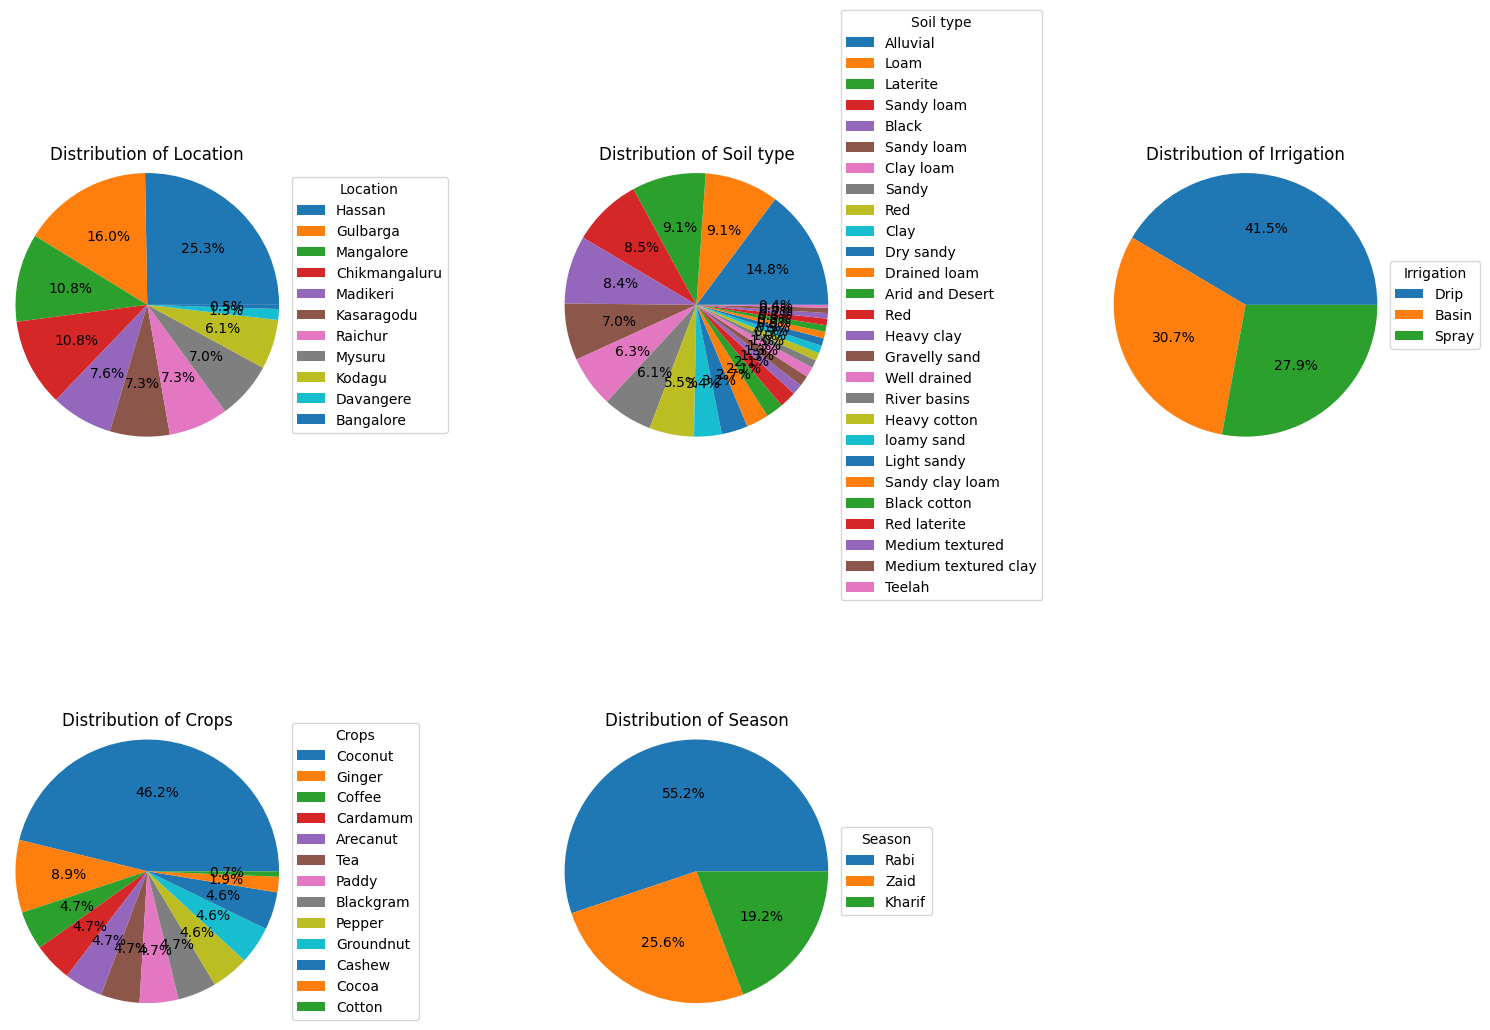

In [14]:
variables = ["Location", "Soil type", "Irrigation", "Crops", "Season"]

# Dynamically determine rows and columns based on the number of variables
n_variables = len(variables)
n_cols = 3  # Fixed number of columns
n_rows = math.ceil(n_variables / n_cols)  # Calculate rows dynamically

# Create subplots with the required number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through the variables and plot on each subplot
for idx, variable in enumerate(variables):
    variable_counts = df[variable].value_counts()

    # Plot pie chart on the corresponding subplot
    wedges, texts, autotexts = axes[idx].pie(
        variable_counts, autopct='%1.1f%%', radius=1.2
    )

    # Add legend to the right of the pie chart
    axes[idx].legend(
        variable_counts.index,
        title=variable,
        loc="center left",
        bbox_to_anchor=(1, 0.5)
    )

    # Set title for the current subplot
    axes[idx].set_title("Distribution of " + variable)
    axes[idx].set_ylabel('')  # Remove default ylabel for cleaner plots

# Hide any remaining unused axes
for idx in range(len(variables), len(axes)):
    fig.delaxes(axes[idx])

# Adjust spacing between pie charts
plt.tight_layout()
plt.subplots_adjust(wspace=1.0, hspace=1.0)  # Increase horizontal and vertical spacing

# Display the plot
plt.show()


In [15]:
num_columns = df1[["Year",	"Area", "Rainfall", "Temperature", "yeilds",	"Humidity", "price"]]
cat_columns = df1[["Location", "Soil type", "Irrigation", "Crops", "Season"]]

## 3.3. Pairplot for each categorical variable

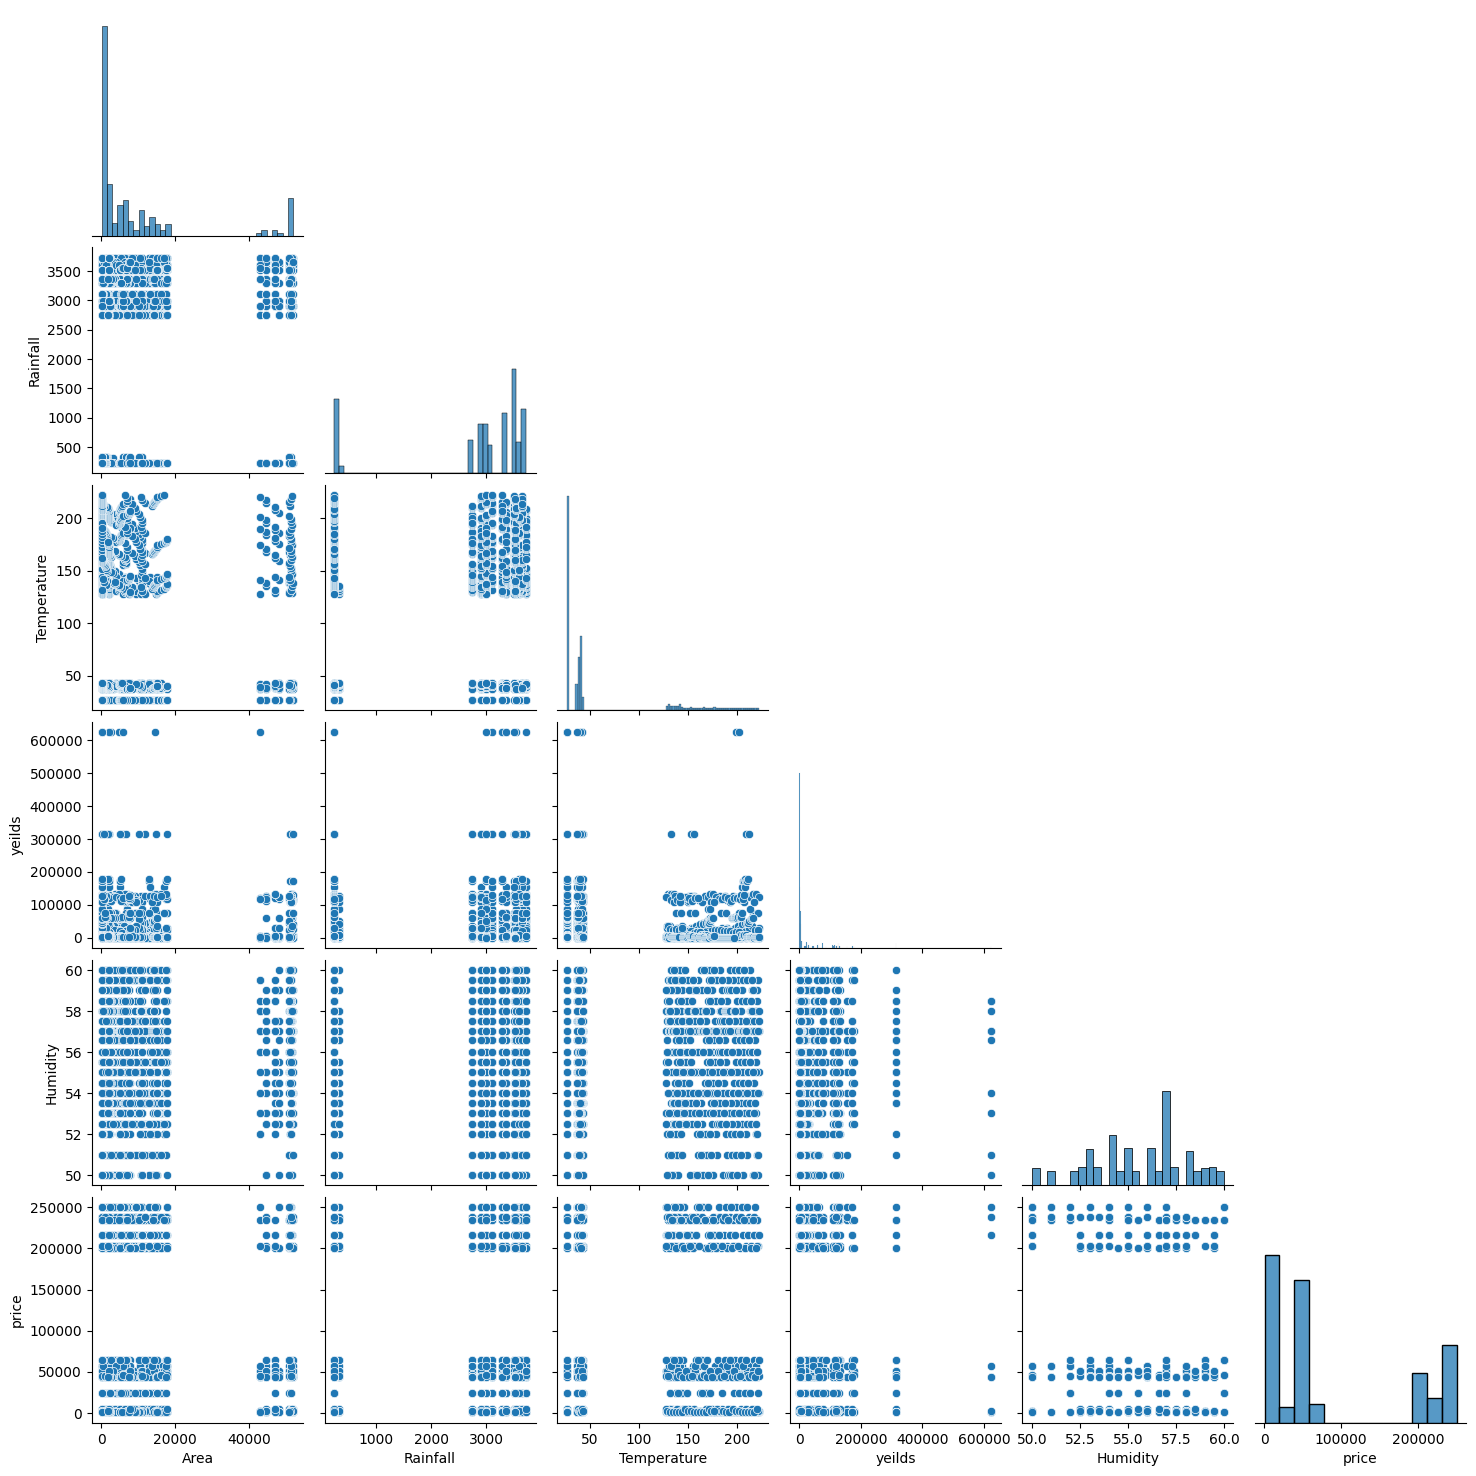

In [16]:
sns.pairplot(data = df1[["Area", "Rainfall", "Temperature", "yeilds",	"Humidity", "price"]], palette="rocket" , corner=True)

## 3.4. Histogram plots of variables

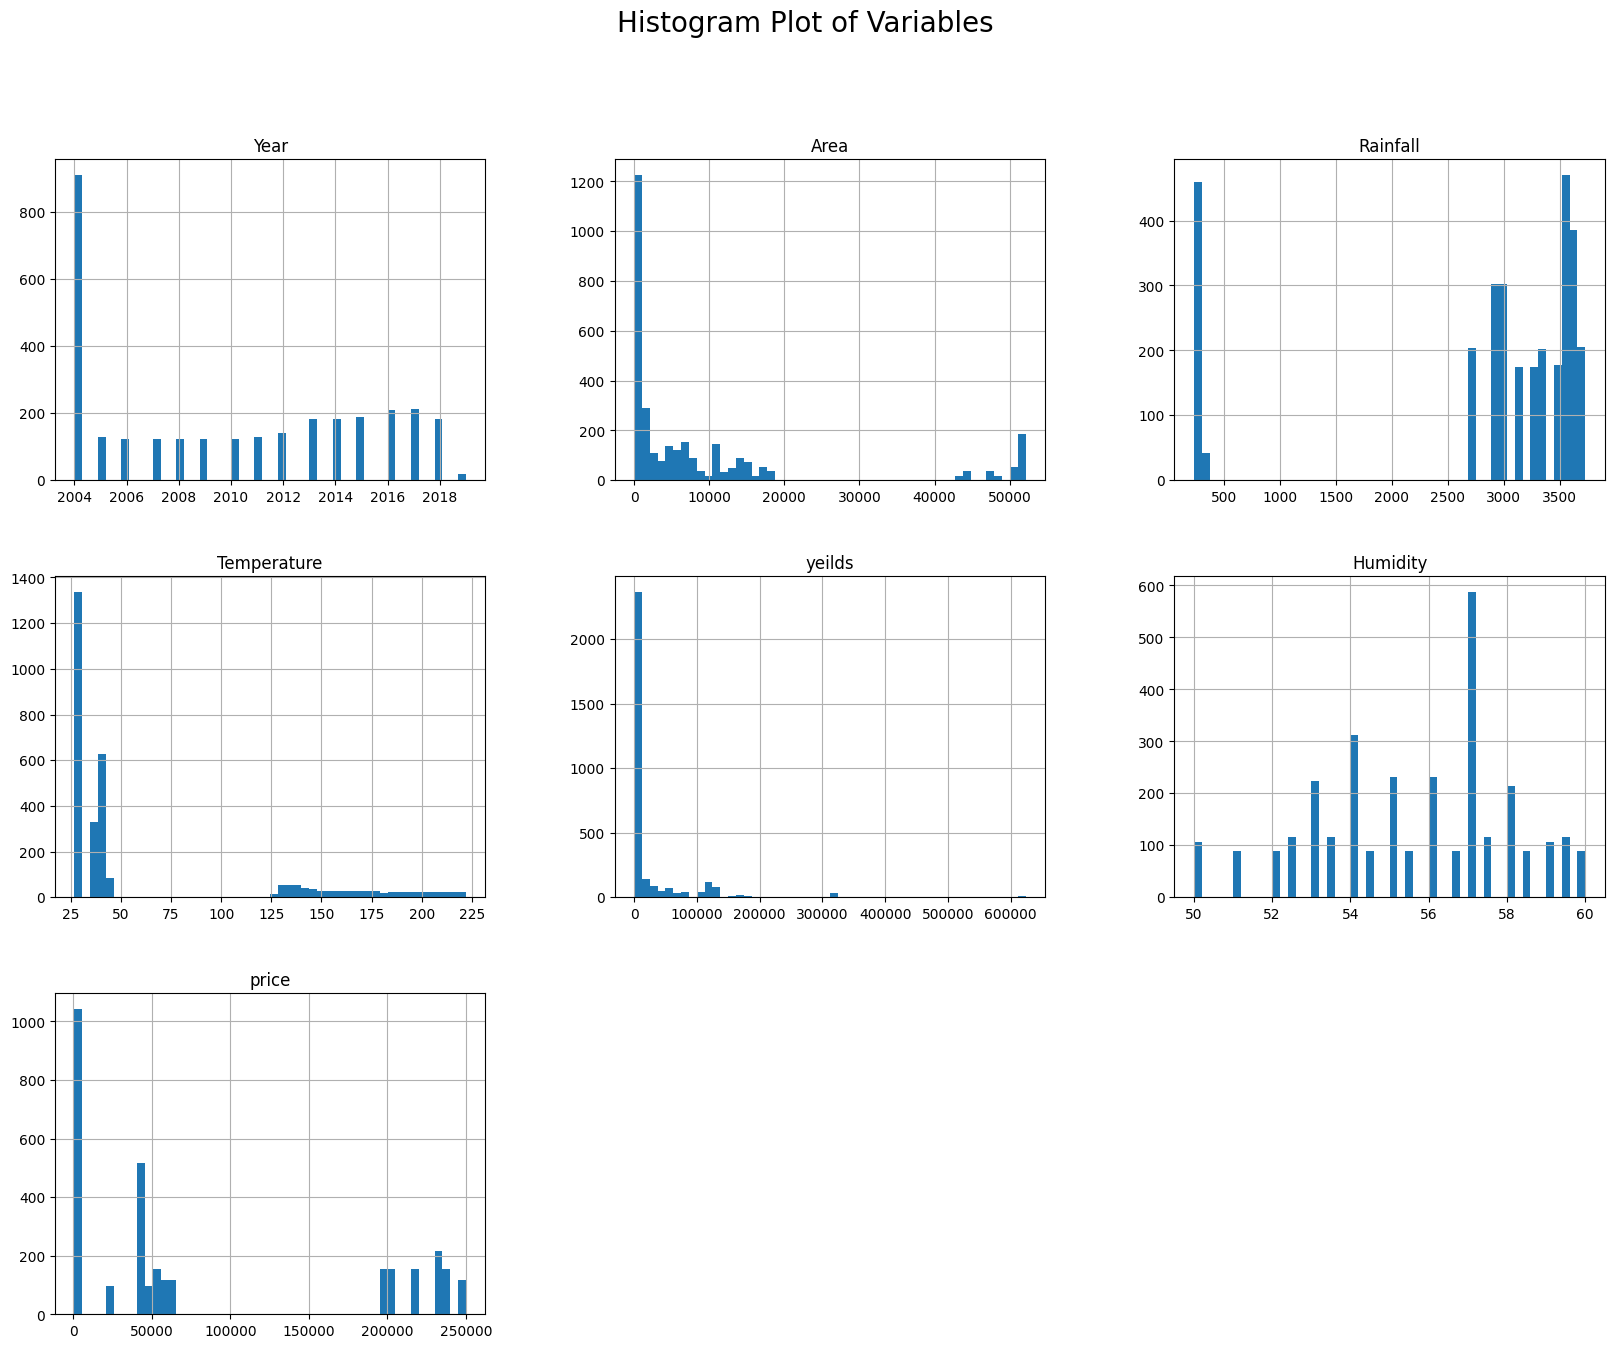

In [17]:
%matplotlib inline
df1.hist(bins=50, figsize=(20,15))
plt.suptitle("Histogram Plot of Variables", fontsize=20)
plt.show()

## 3.5. Countplot of categorical variables

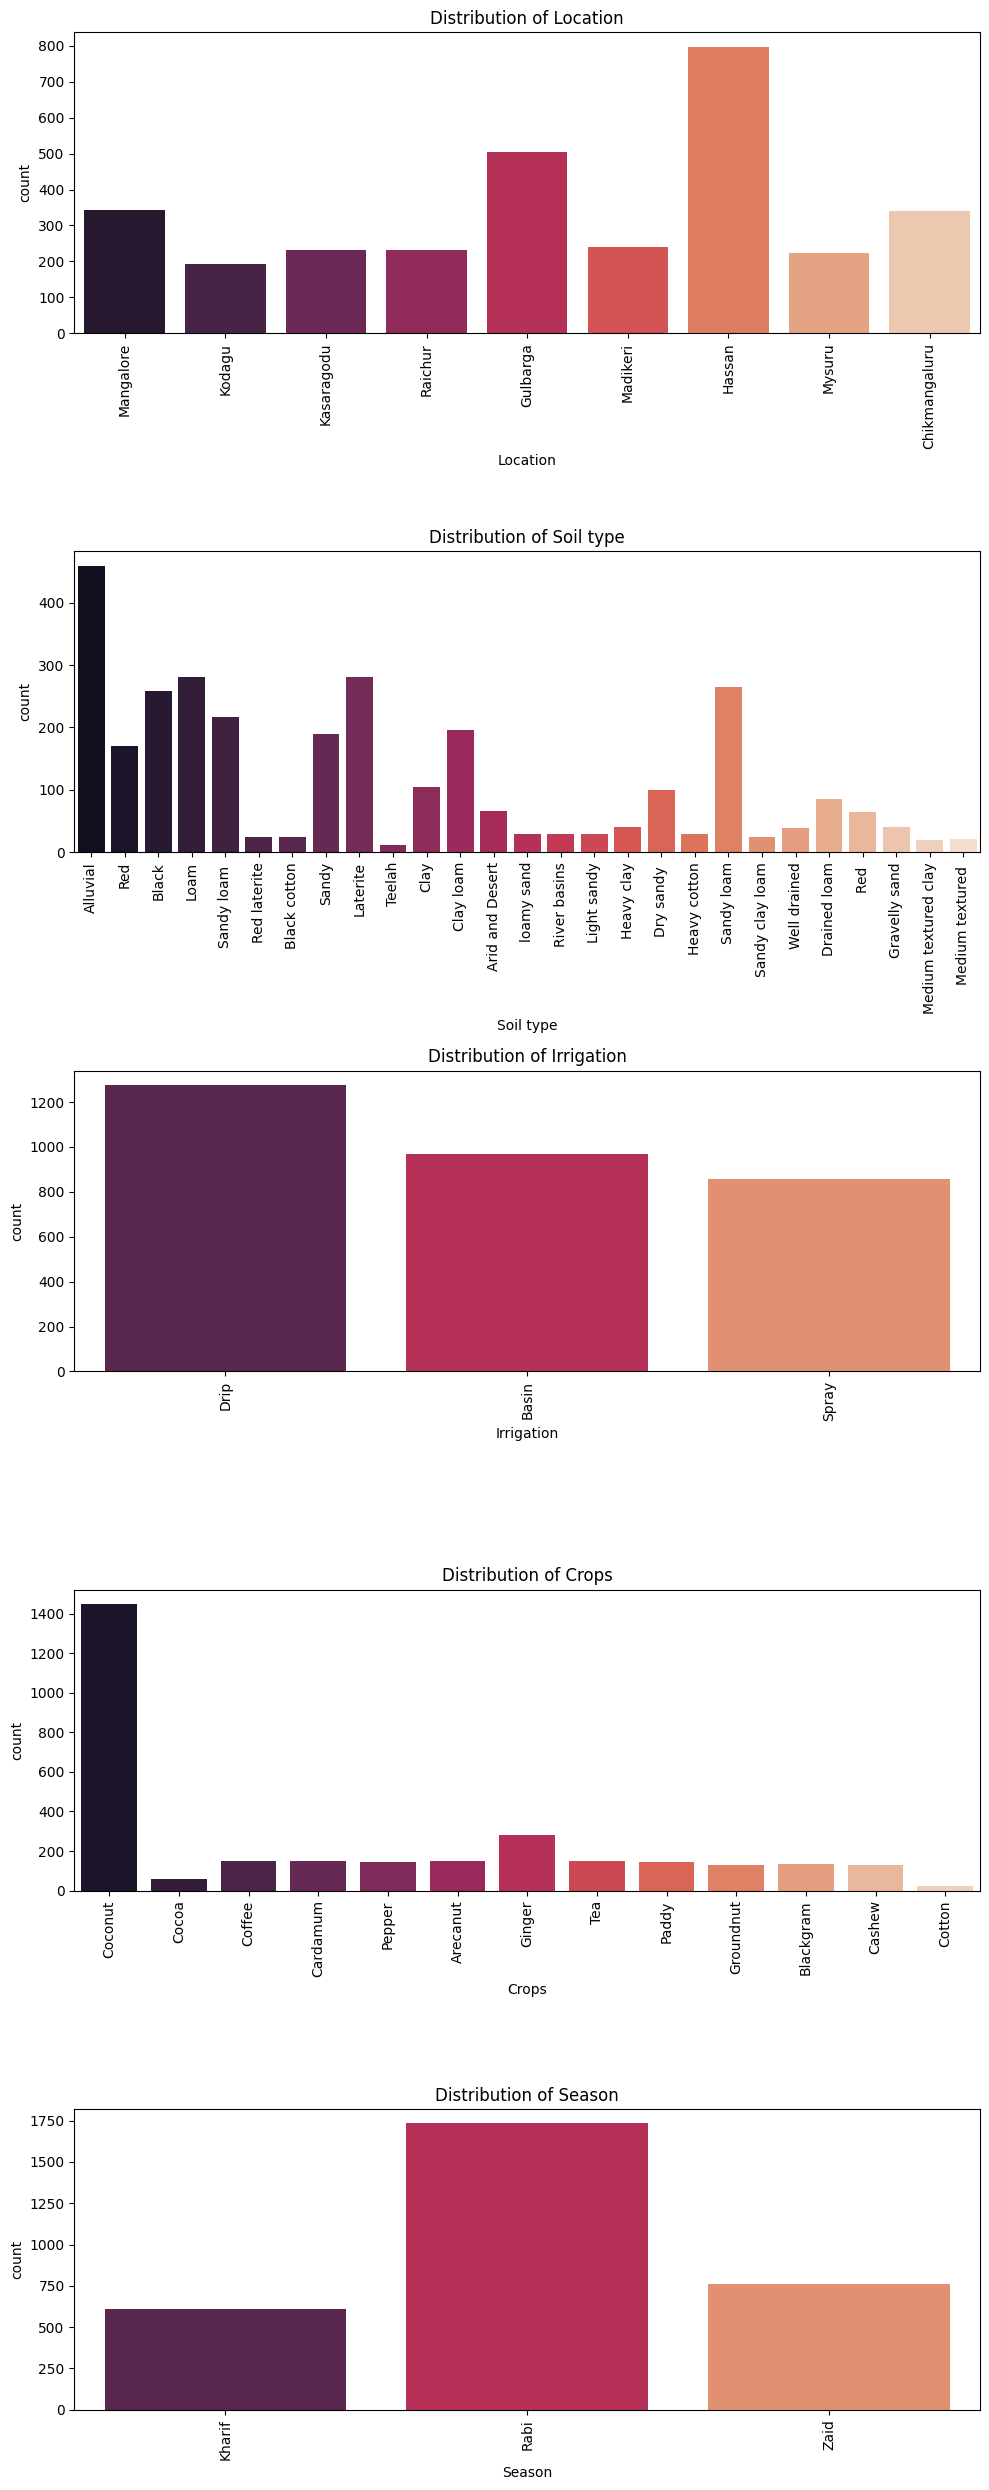

In [18]:
# Calculate the number of rows needed
n_rows = len(cat_columns.columns)

# Create a figure with a single column
fig, axes = plt.subplots(n_rows, 1, figsize=(10, 5 * n_rows))  # Adjust height per plot

# If there's only one row, axes won't be an array, so handle it accordingly
if n_rows == 1:
    axes = [axes]  # Wrap single axis in a list for consistent iteration

# Plot each categorical column
for idx, col in enumerate(cat_columns.columns):
    sns.countplot(data=df1, x=col, palette='rocket', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## 3.6. Countplot of categorical variables vs Year

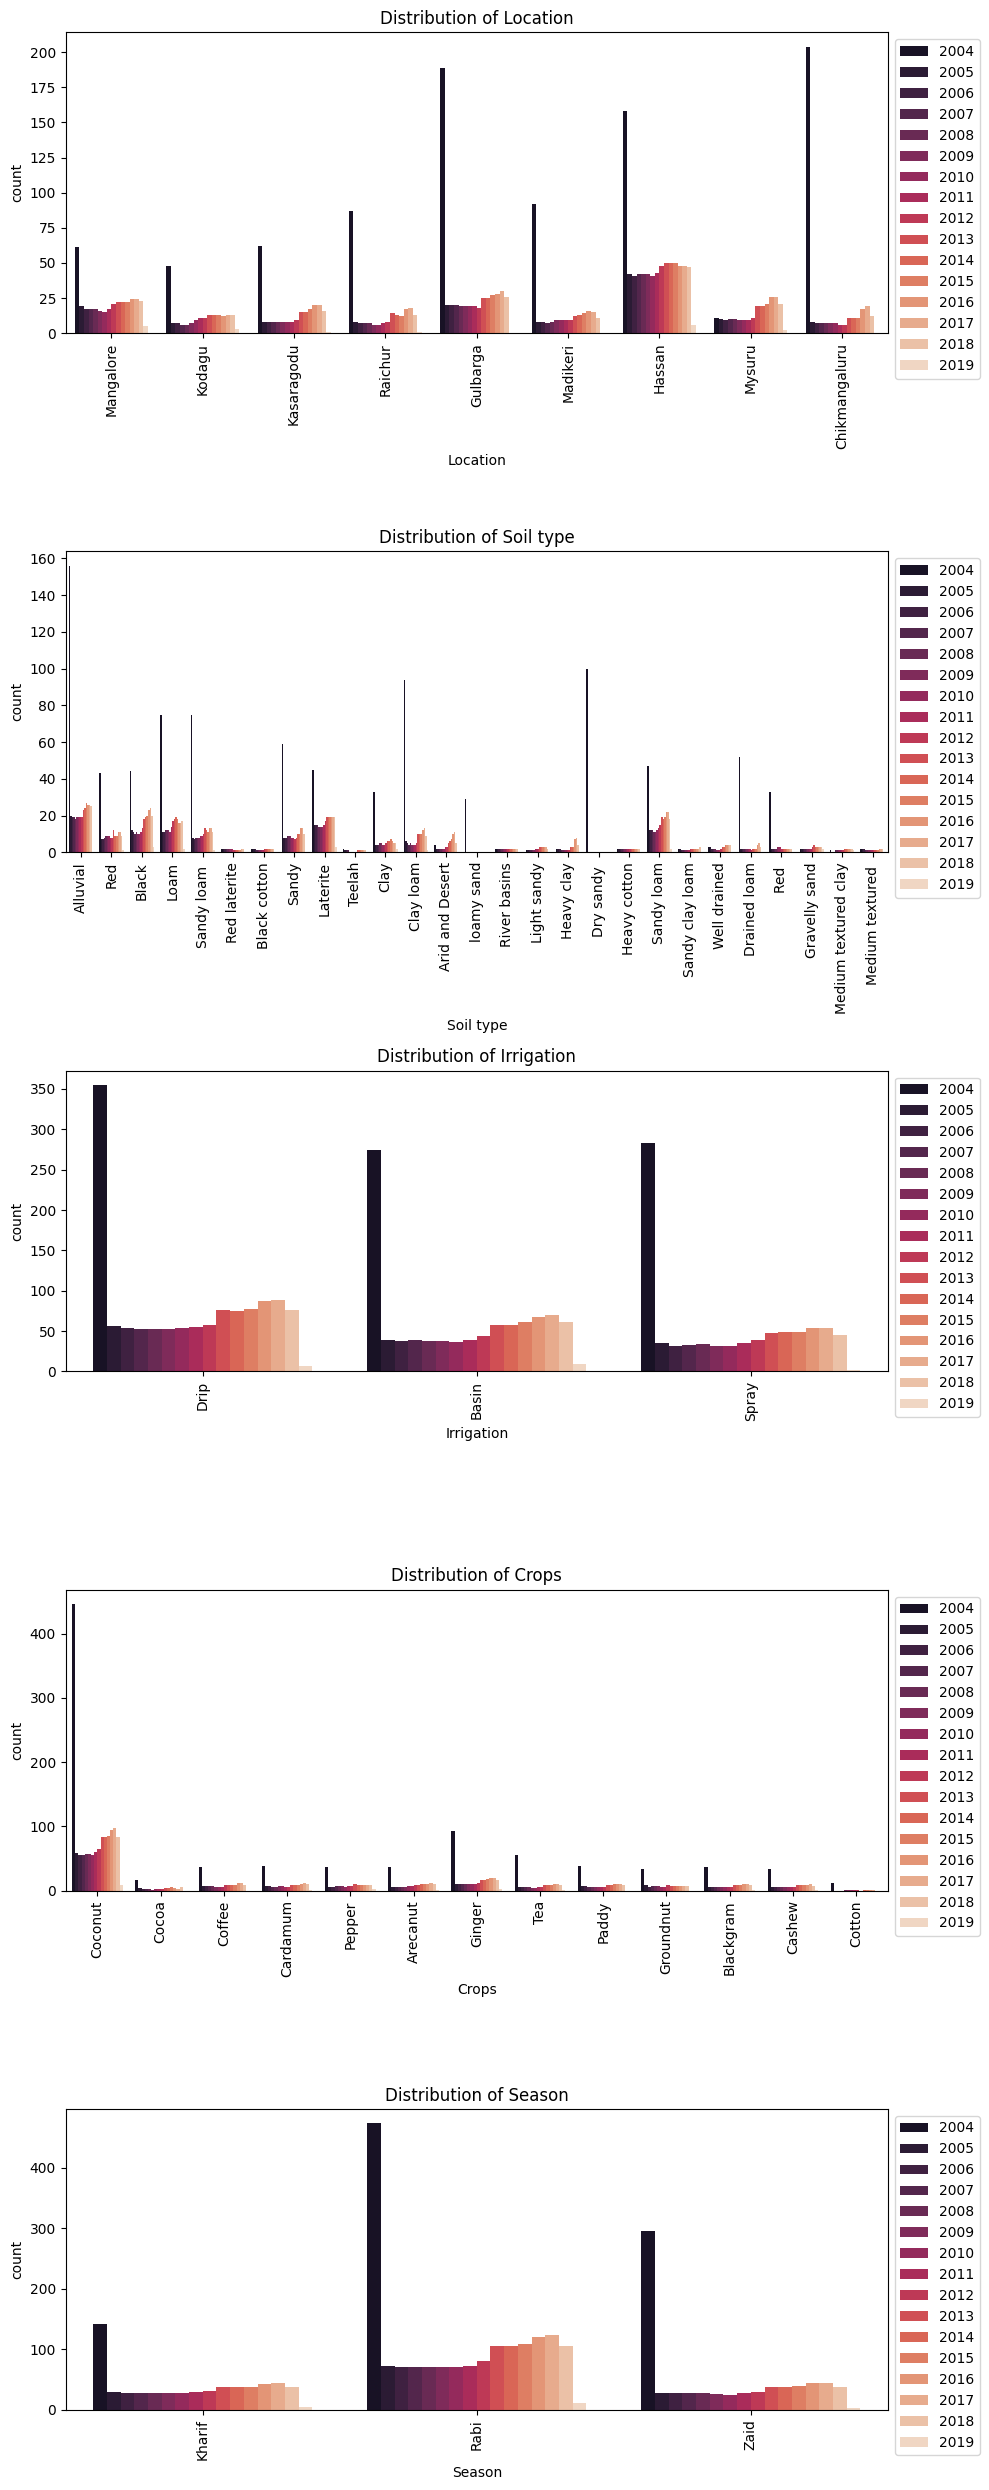

In [19]:
# Calculate the number of rows needed
n_rows = len(cat_columns.columns)

# Create a figure with a single column
fig, axes = plt.subplots(n_rows, 1, figsize=(10, 5 * n_rows))  # Adjust height per plot

# If there's only one row, axes won't be an array, so handle it accordingly
if n_rows == 1:
    axes = [axes]  # Wrap single axis in a list for consistent iteration

# Plot each countplot
for ax, col in zip(axes, cat_columns.columns):
    sns.countplot(data=df1, x=col, hue="Year", palette='rocket', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels

    # Move legend to the right side of the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position

plt.tight_layout()
plt.show()


## 3.7. Countplot of numerical variables vs Season

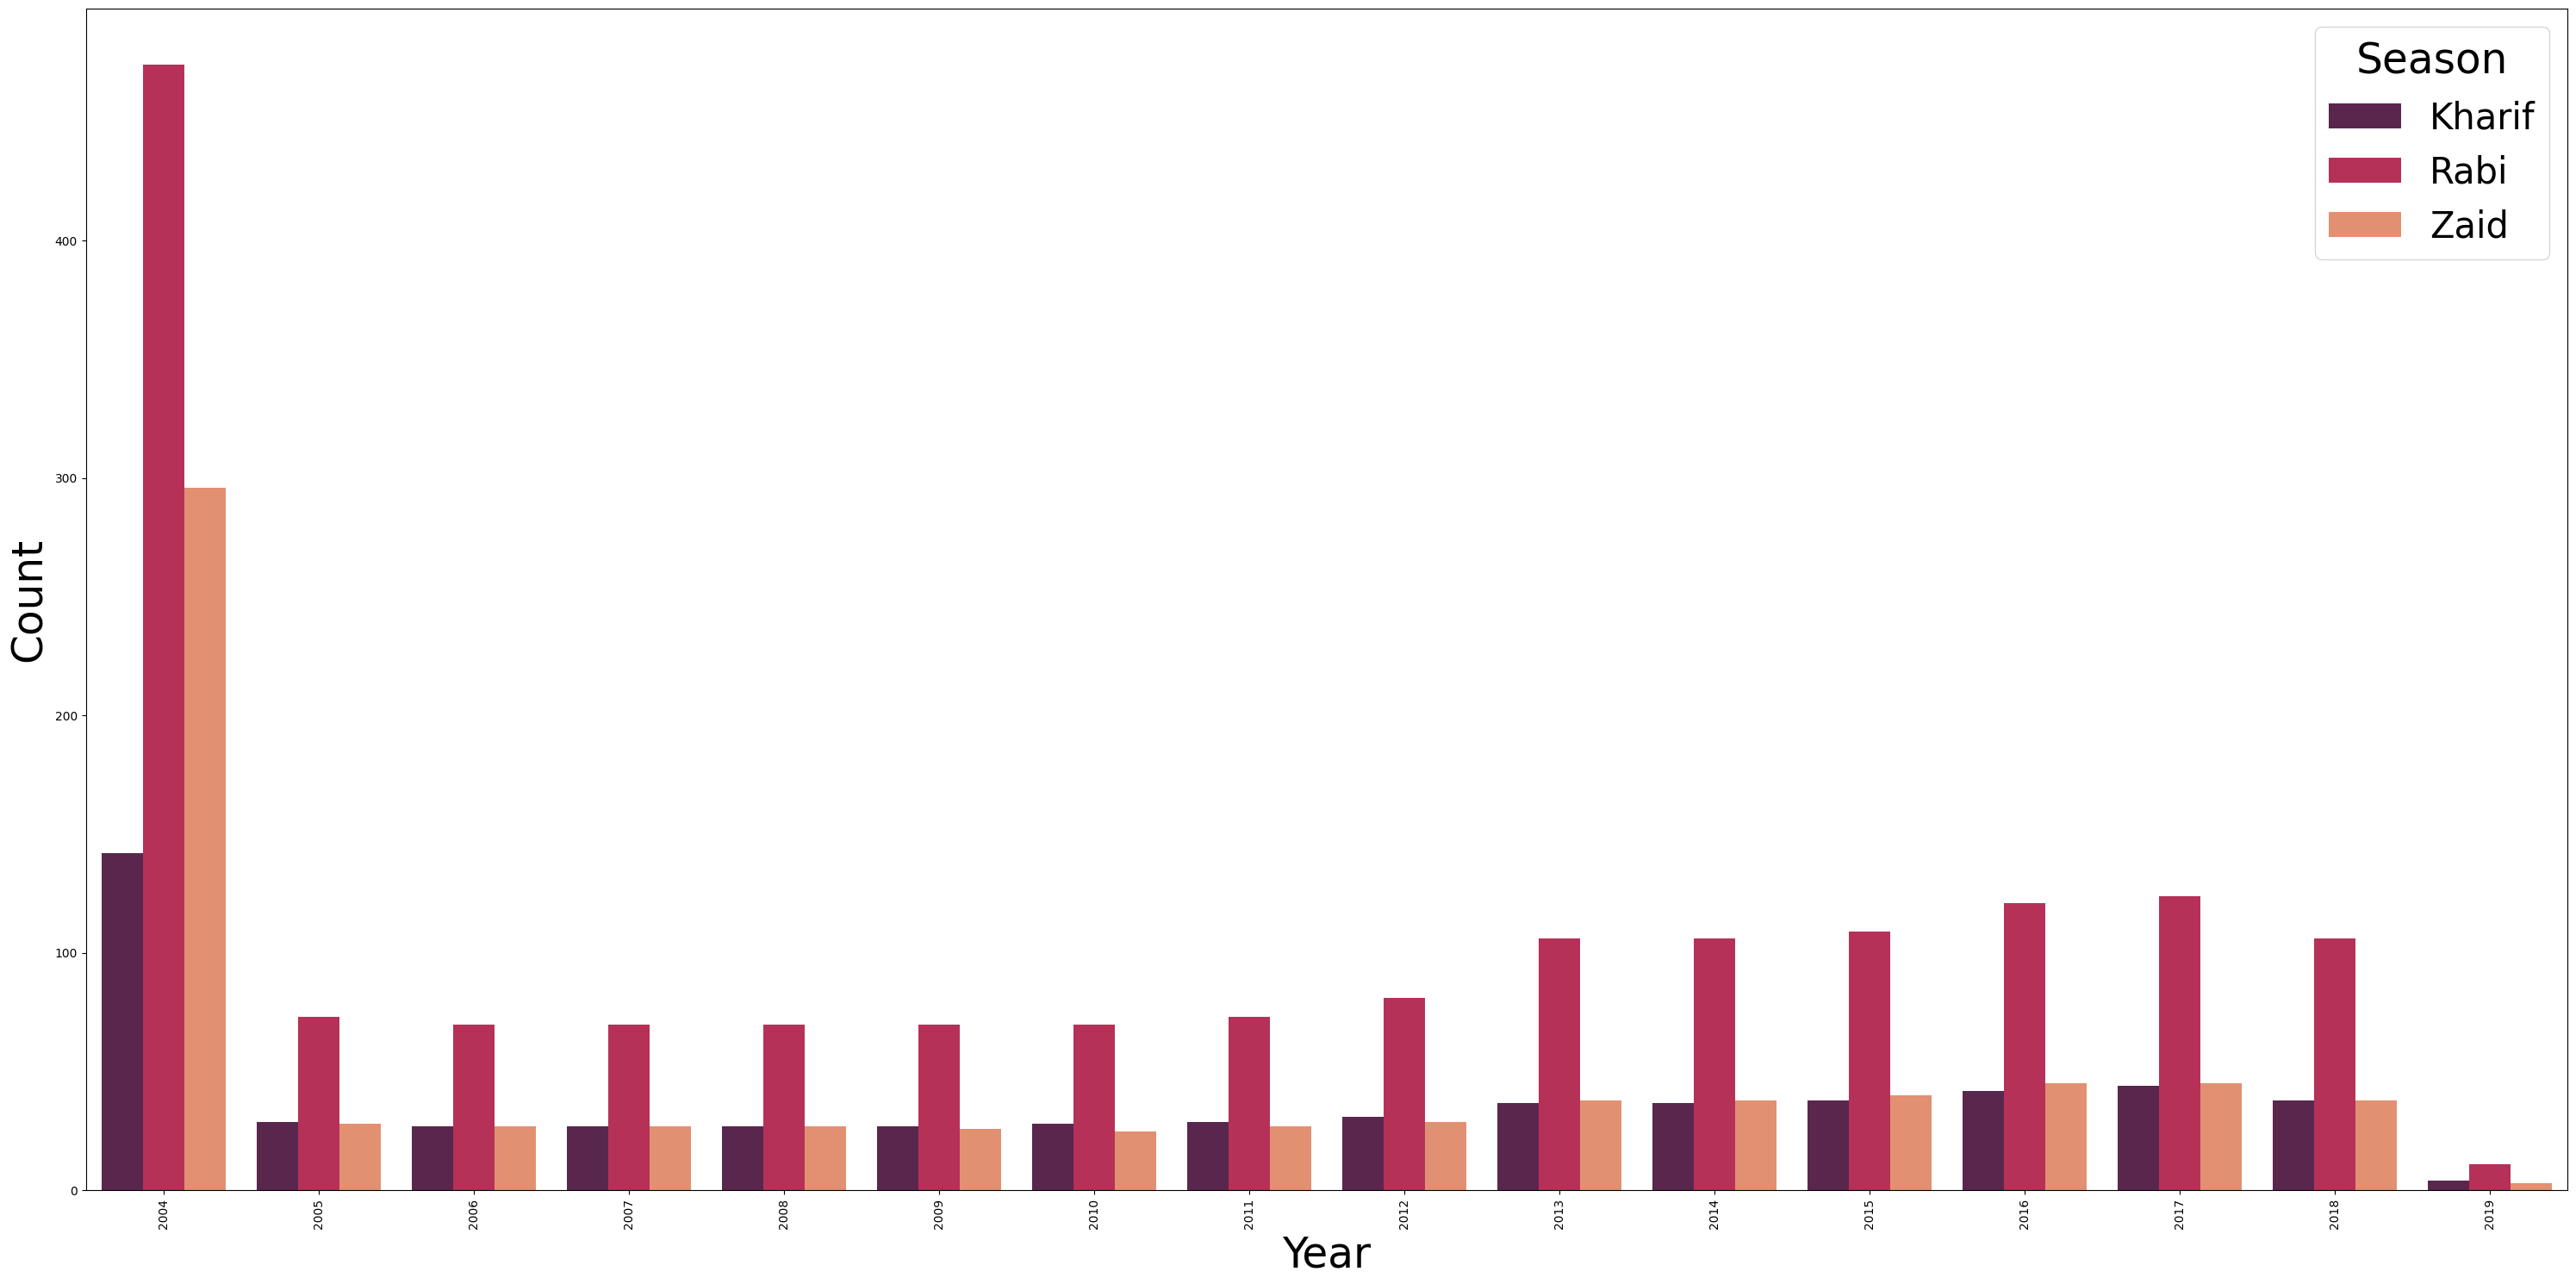

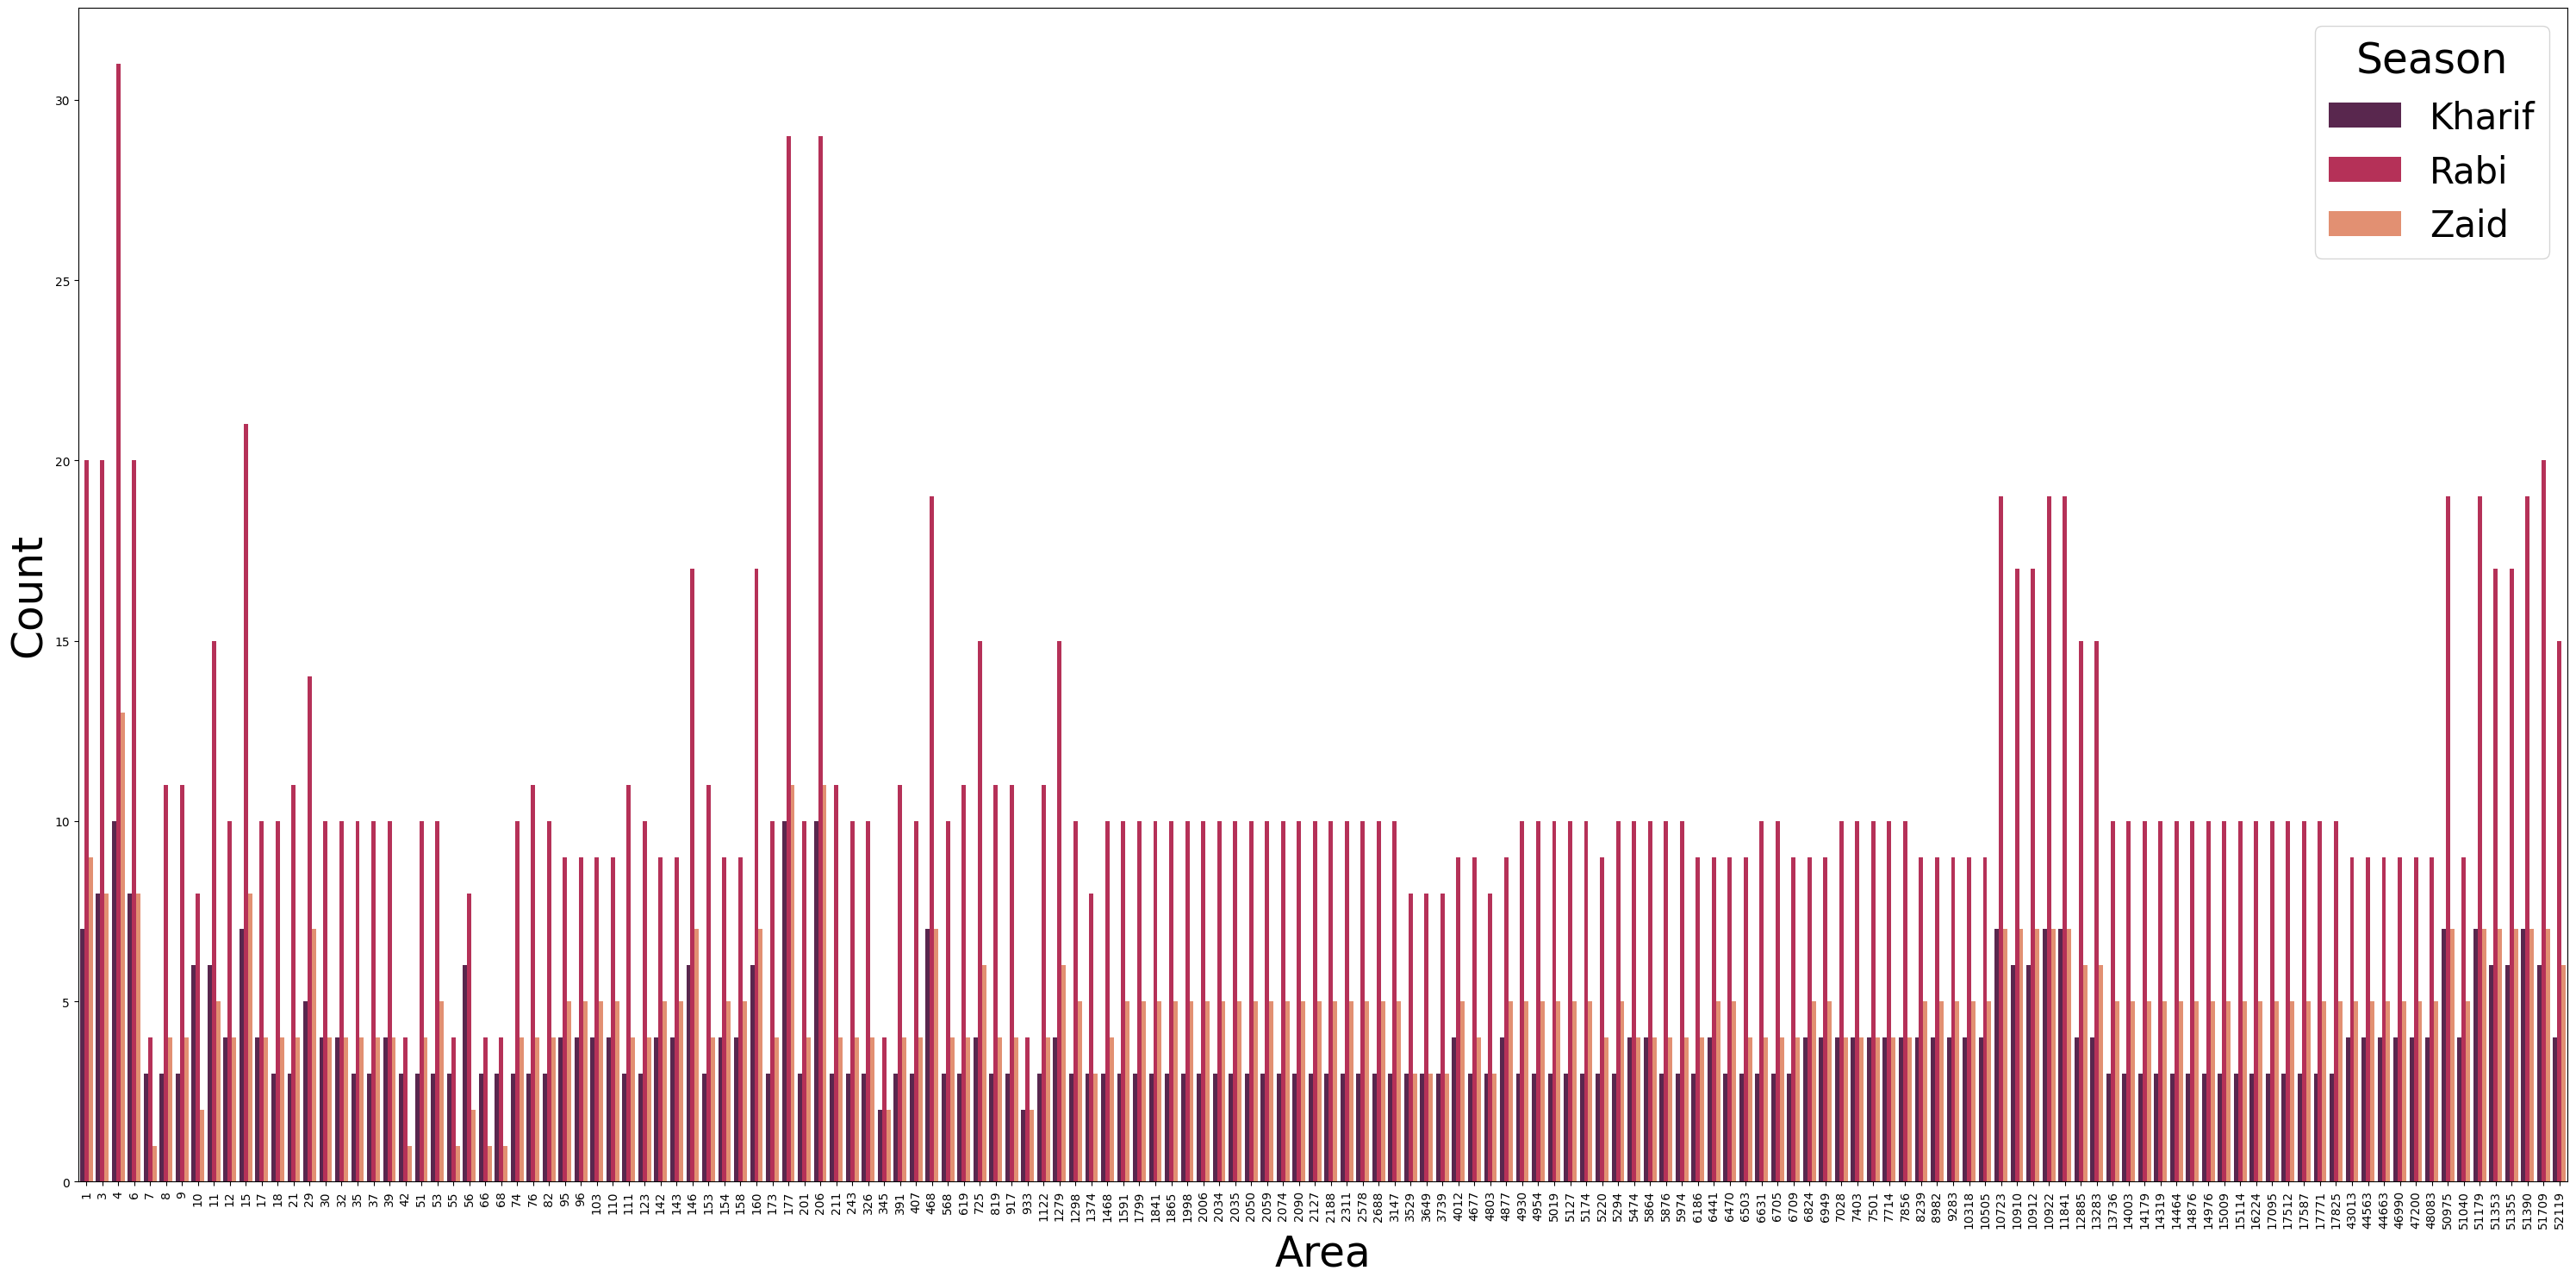

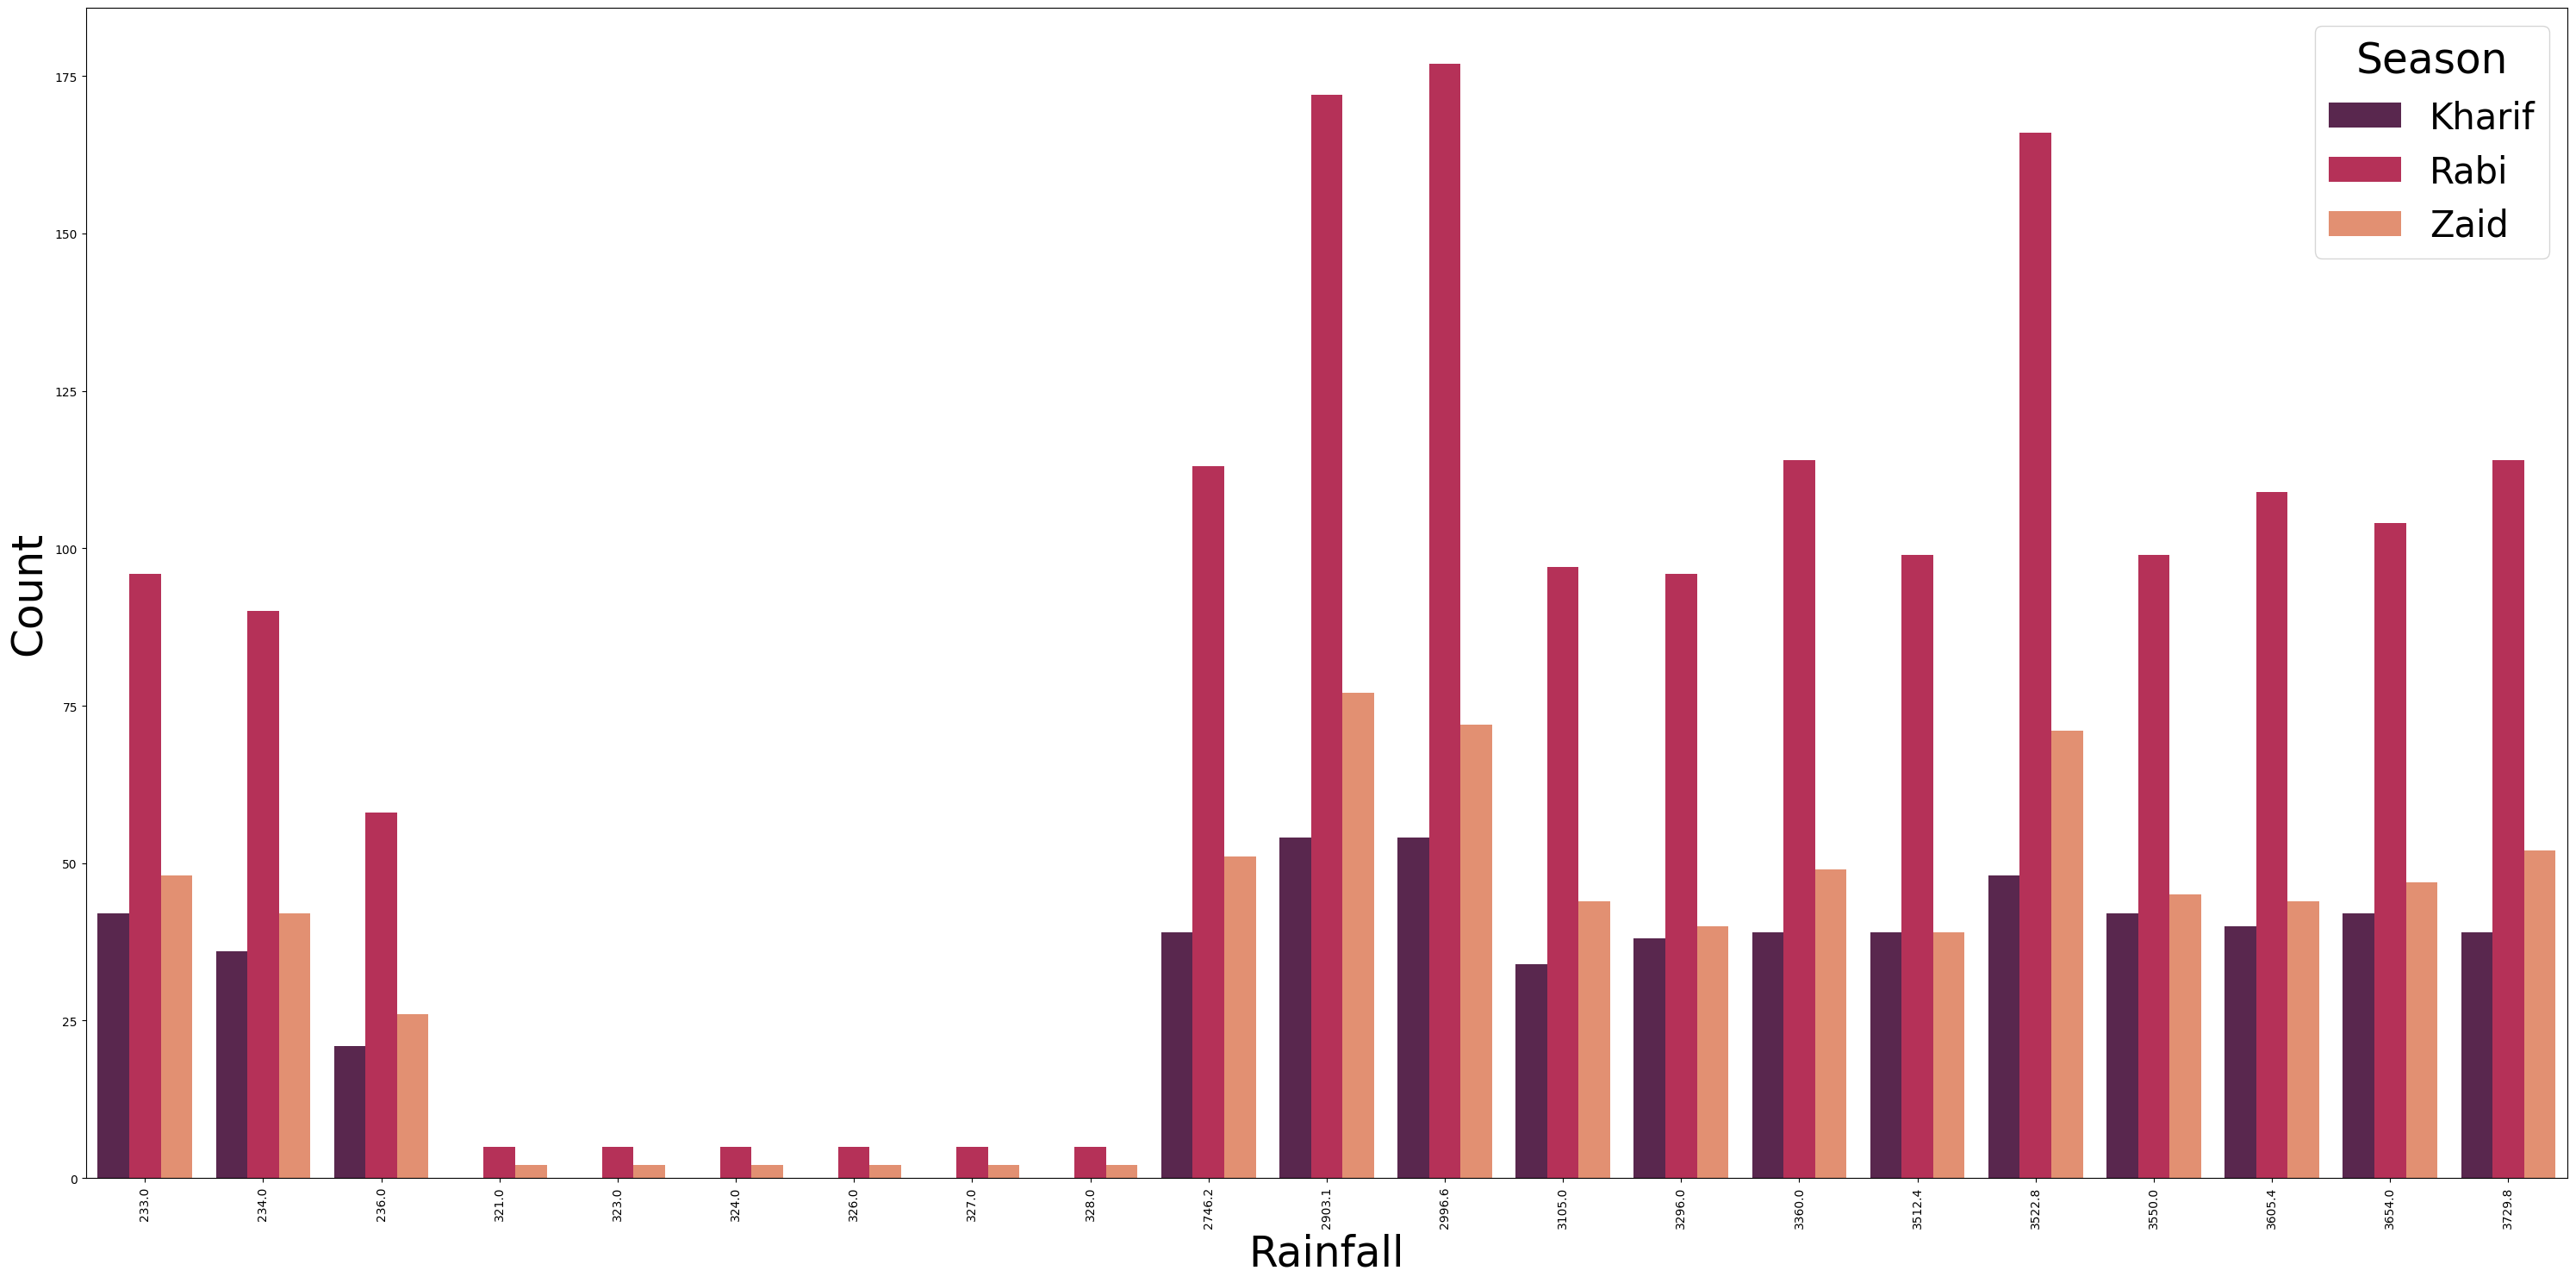

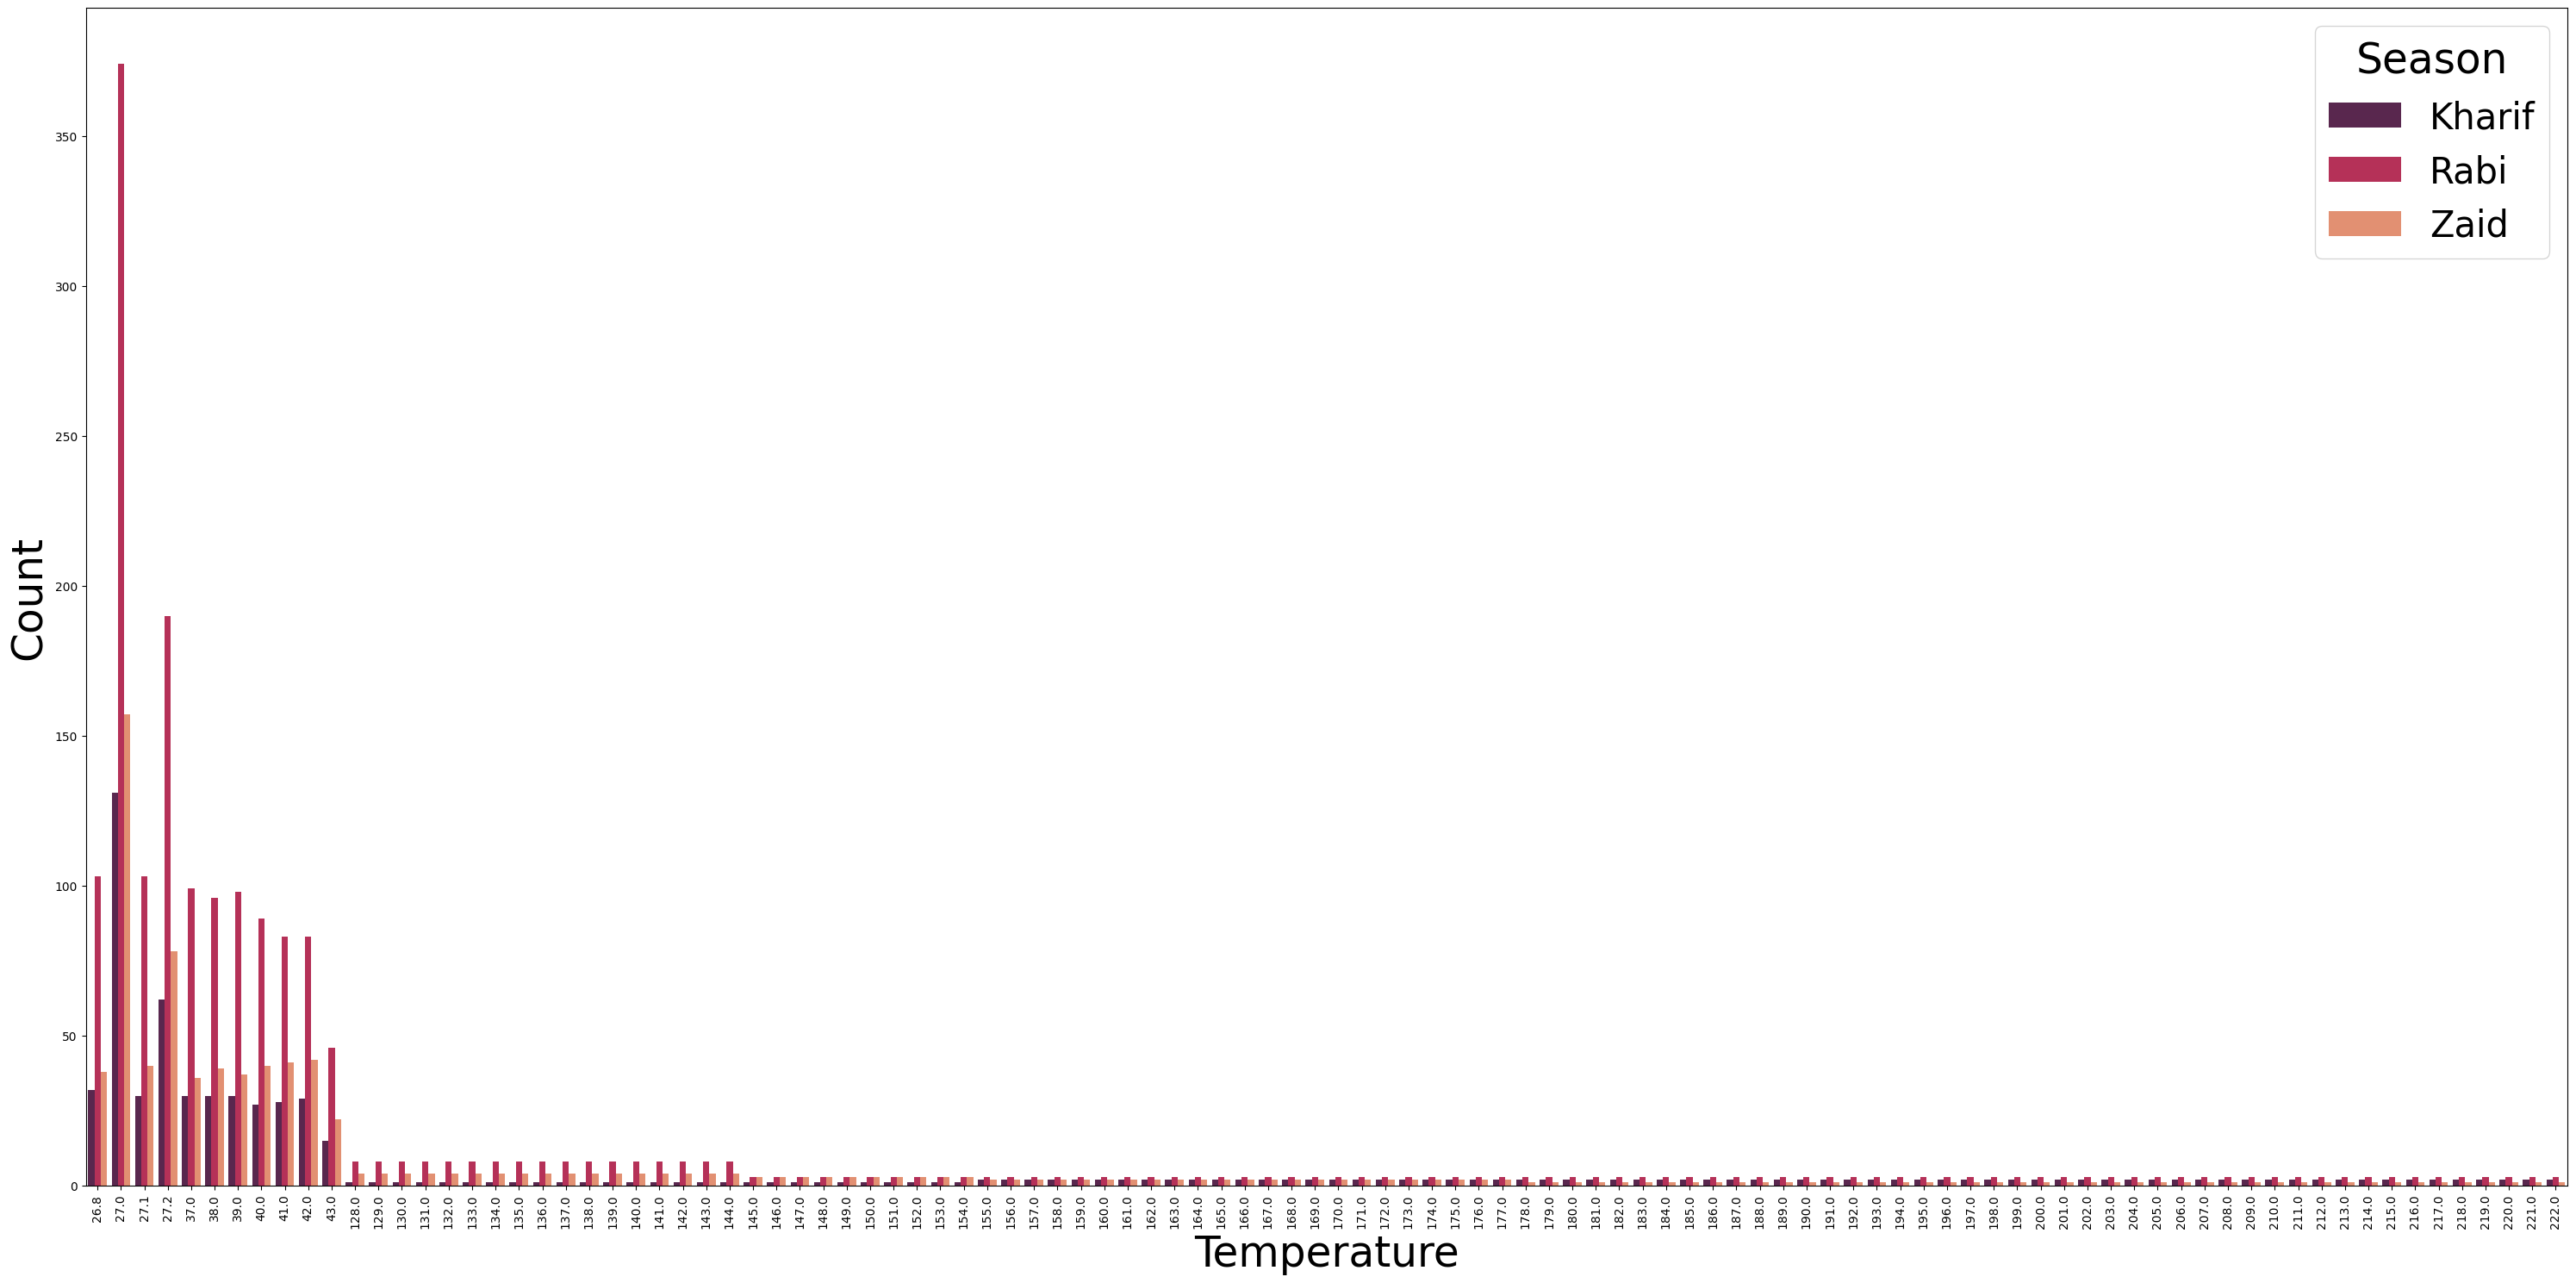

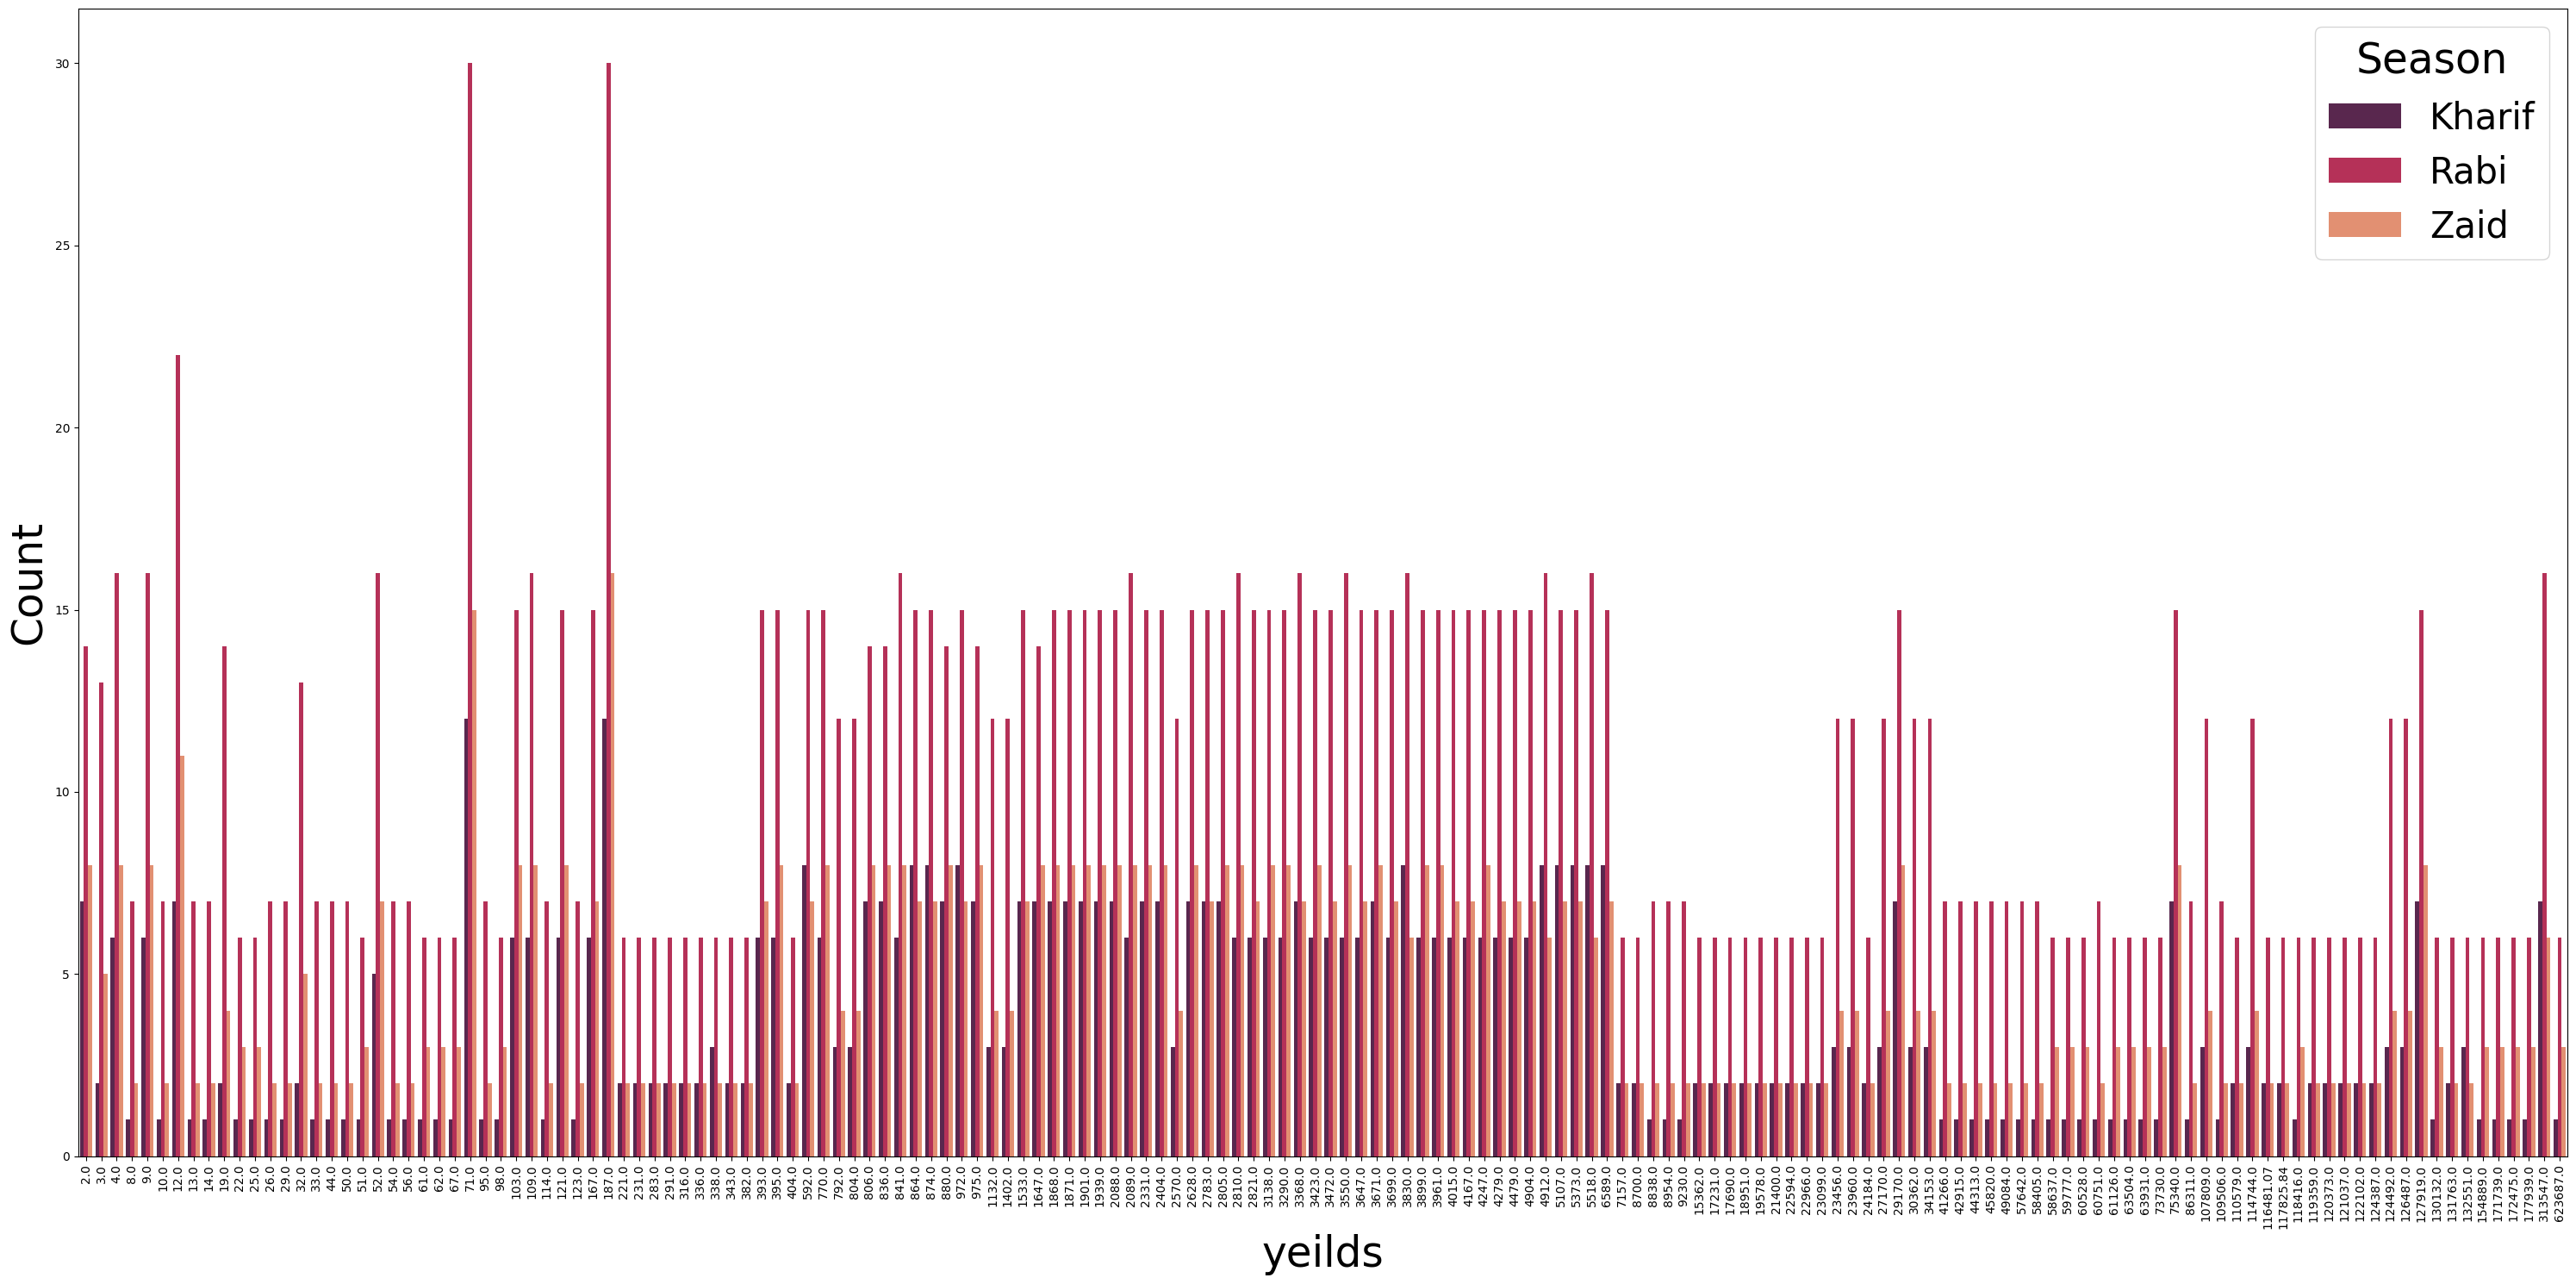

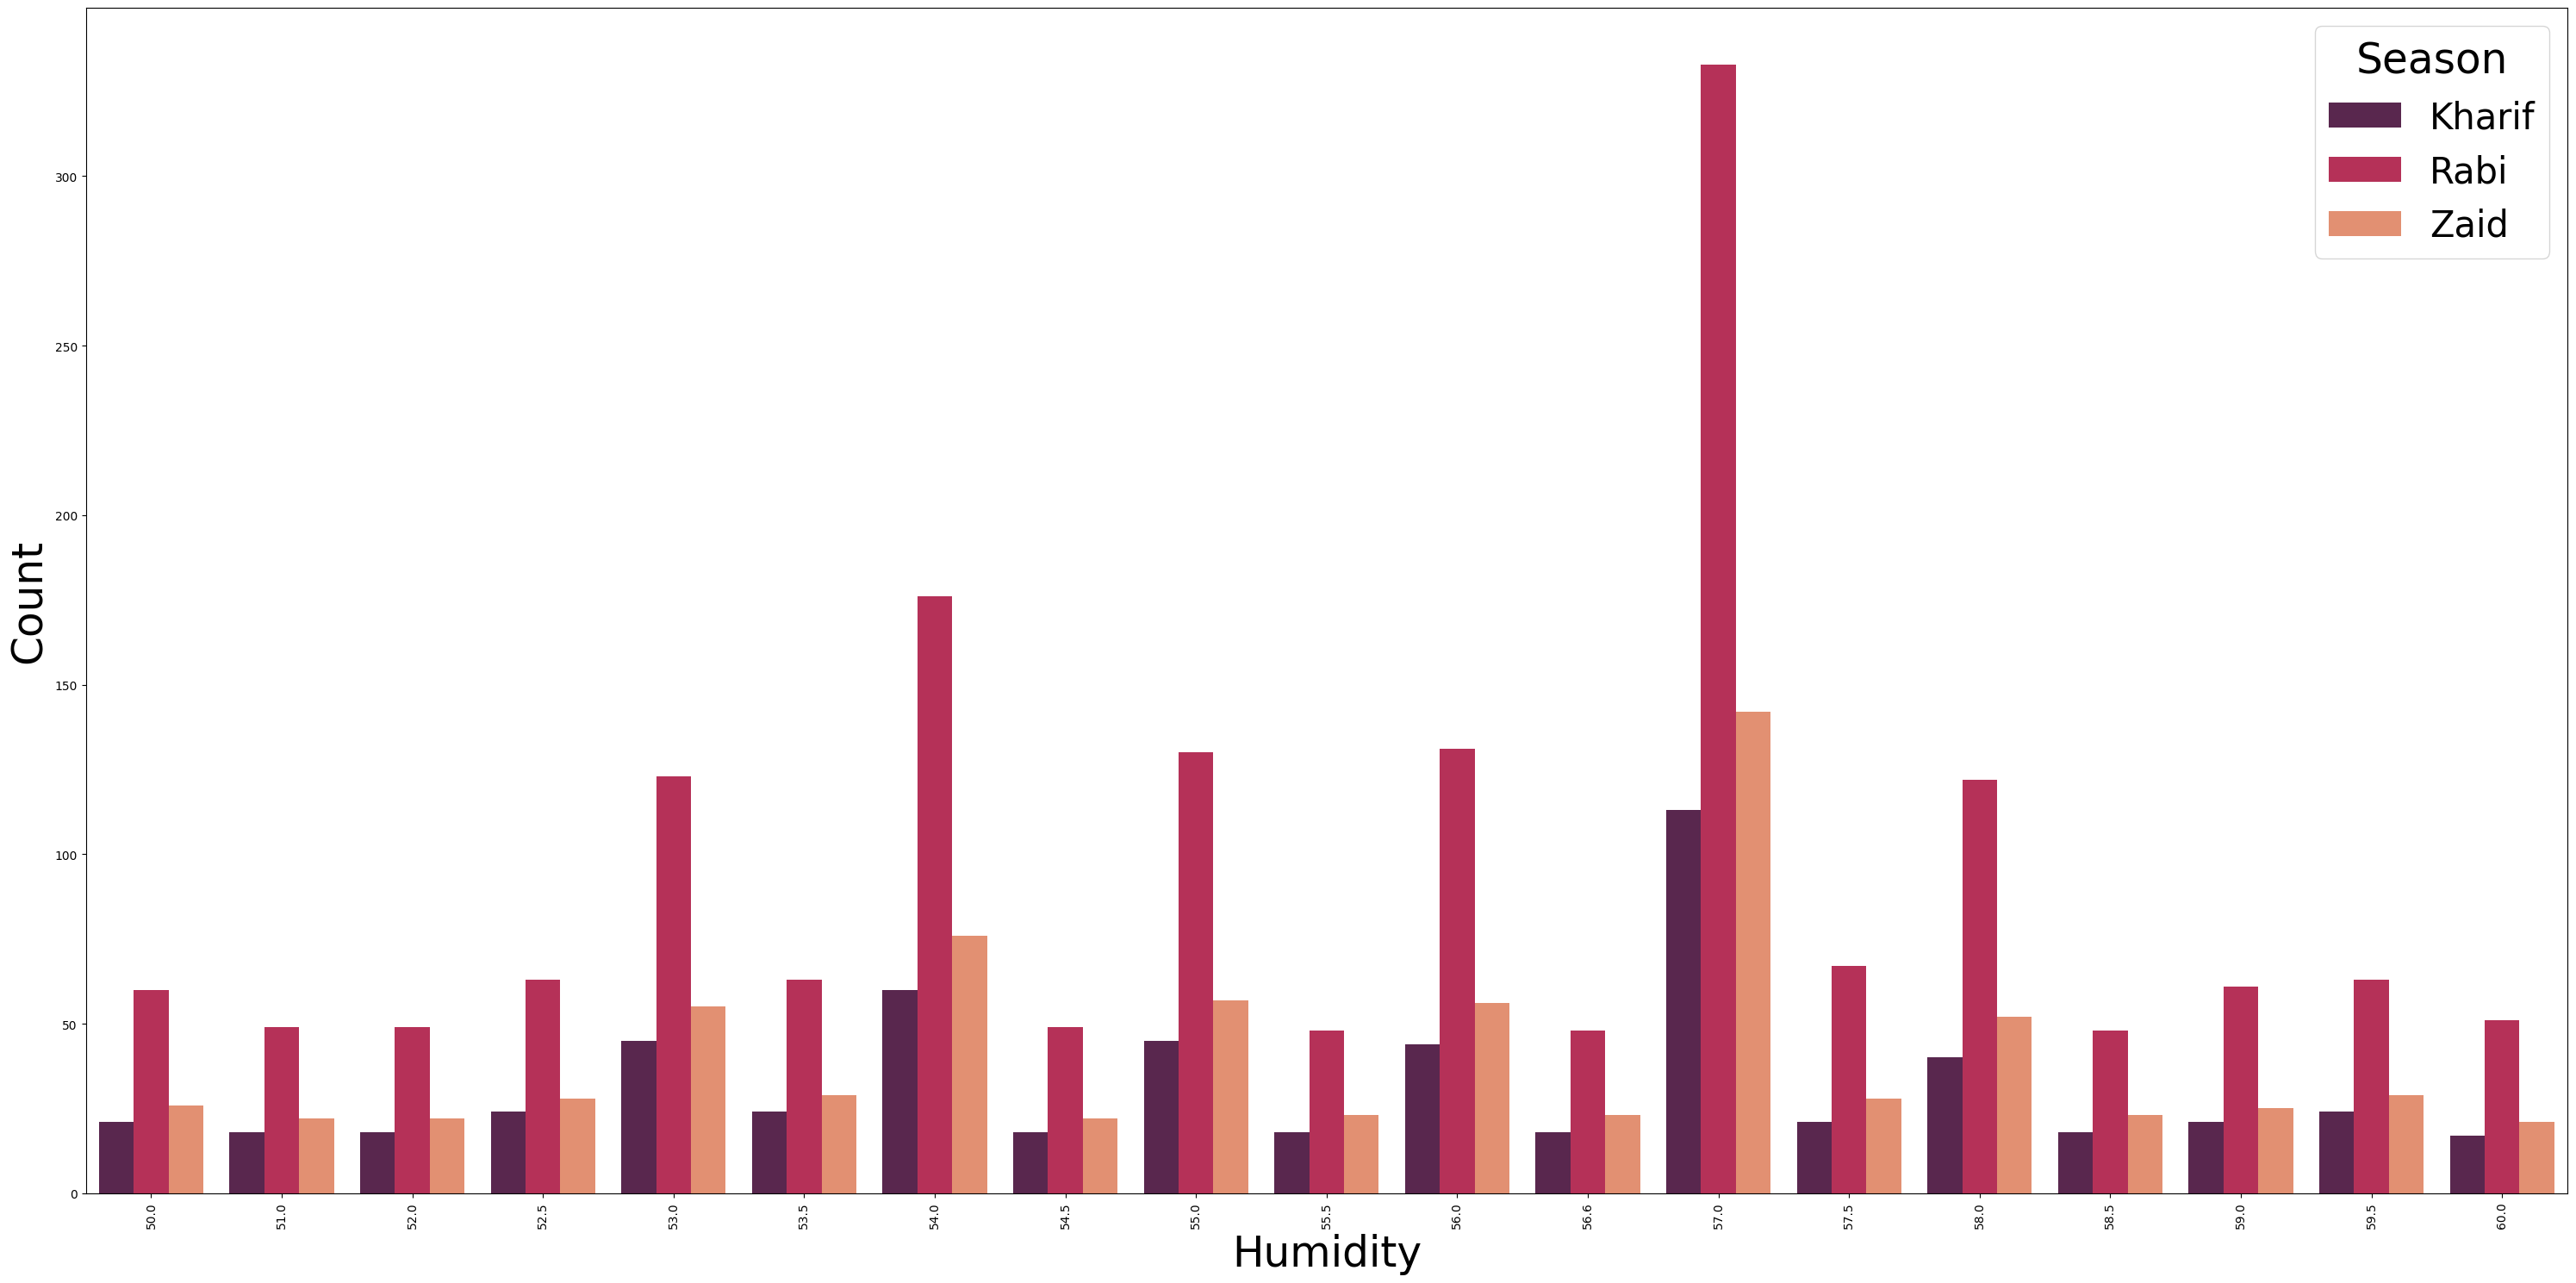

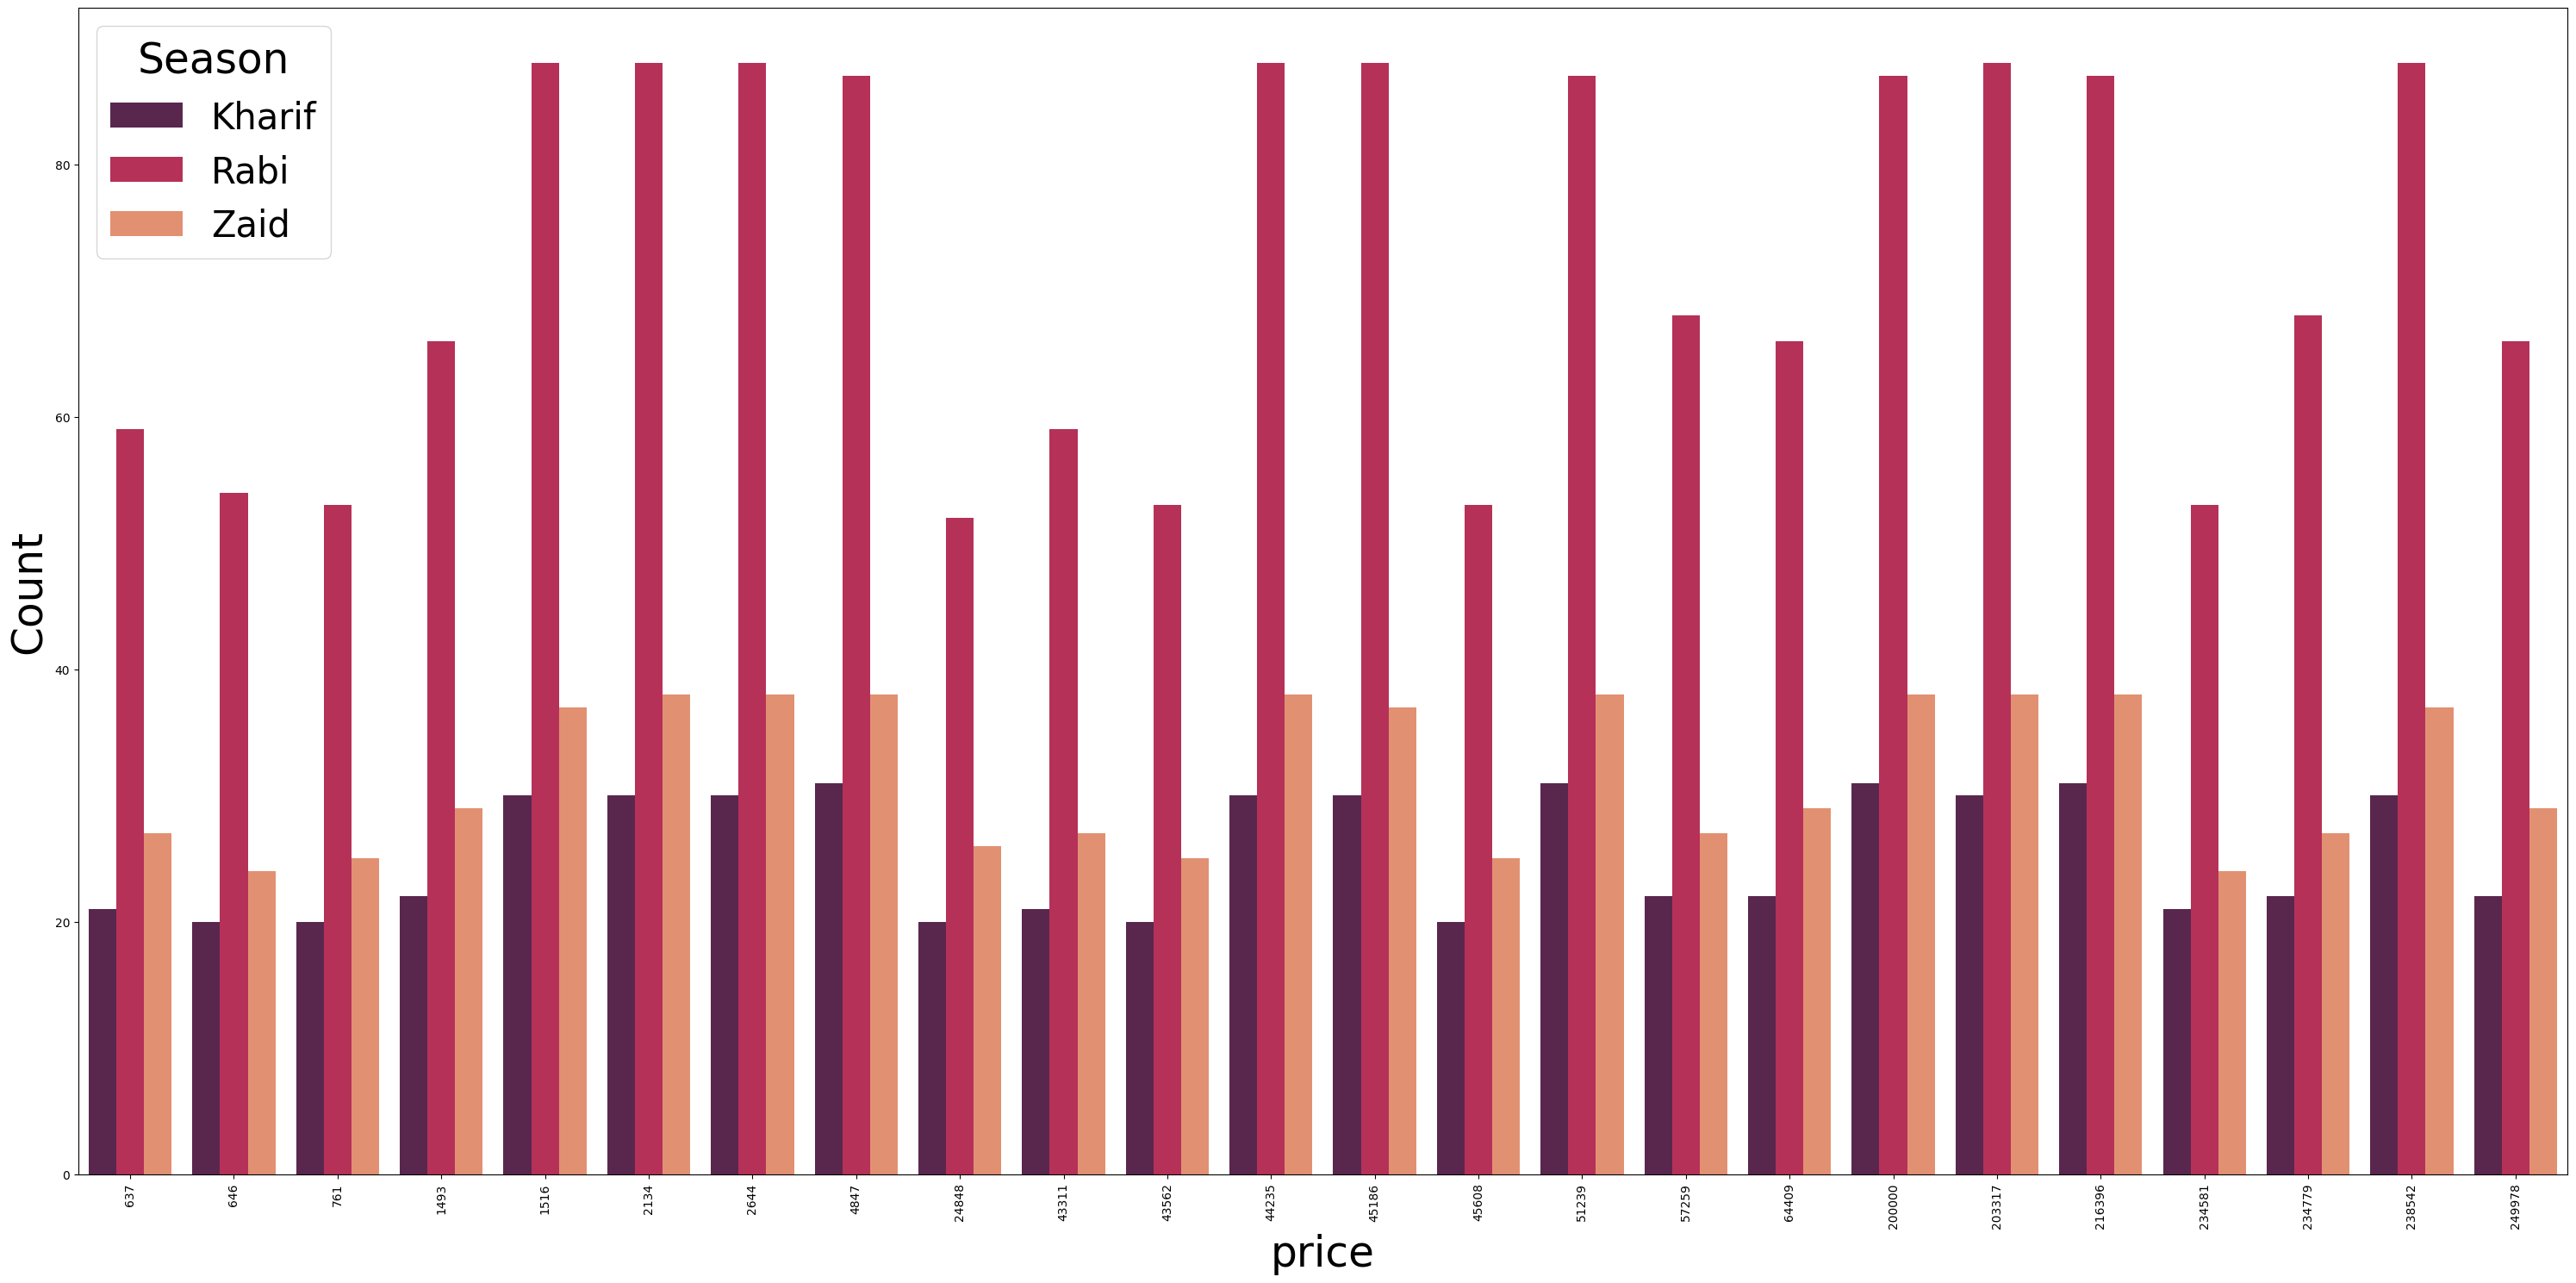

In [20]:
# Loop through each column in num_columns
for i, col in enumerate(num_columns):

    plt.figure(figsize=(30, 15))

    # Create countplot
    myplot = sns.countplot(data=df1, x=col, hue="Season", palette='rocket')

    # Rotate x-tick labels and adjust label sizes
    myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)

    # Set axis labels
    myplot.set_xlabel(col, fontsize=35)
    myplot.set_ylabel("Count", fontsize=35)

    # Increase legend size
    myplot.legend(title='Season', fontsize=30, title_fontsize=35)

    # Adjust the layout and show the plot
    plt.tight_layout()
    plt.show()


## 3.8. Density vs Box plot for numerical variables

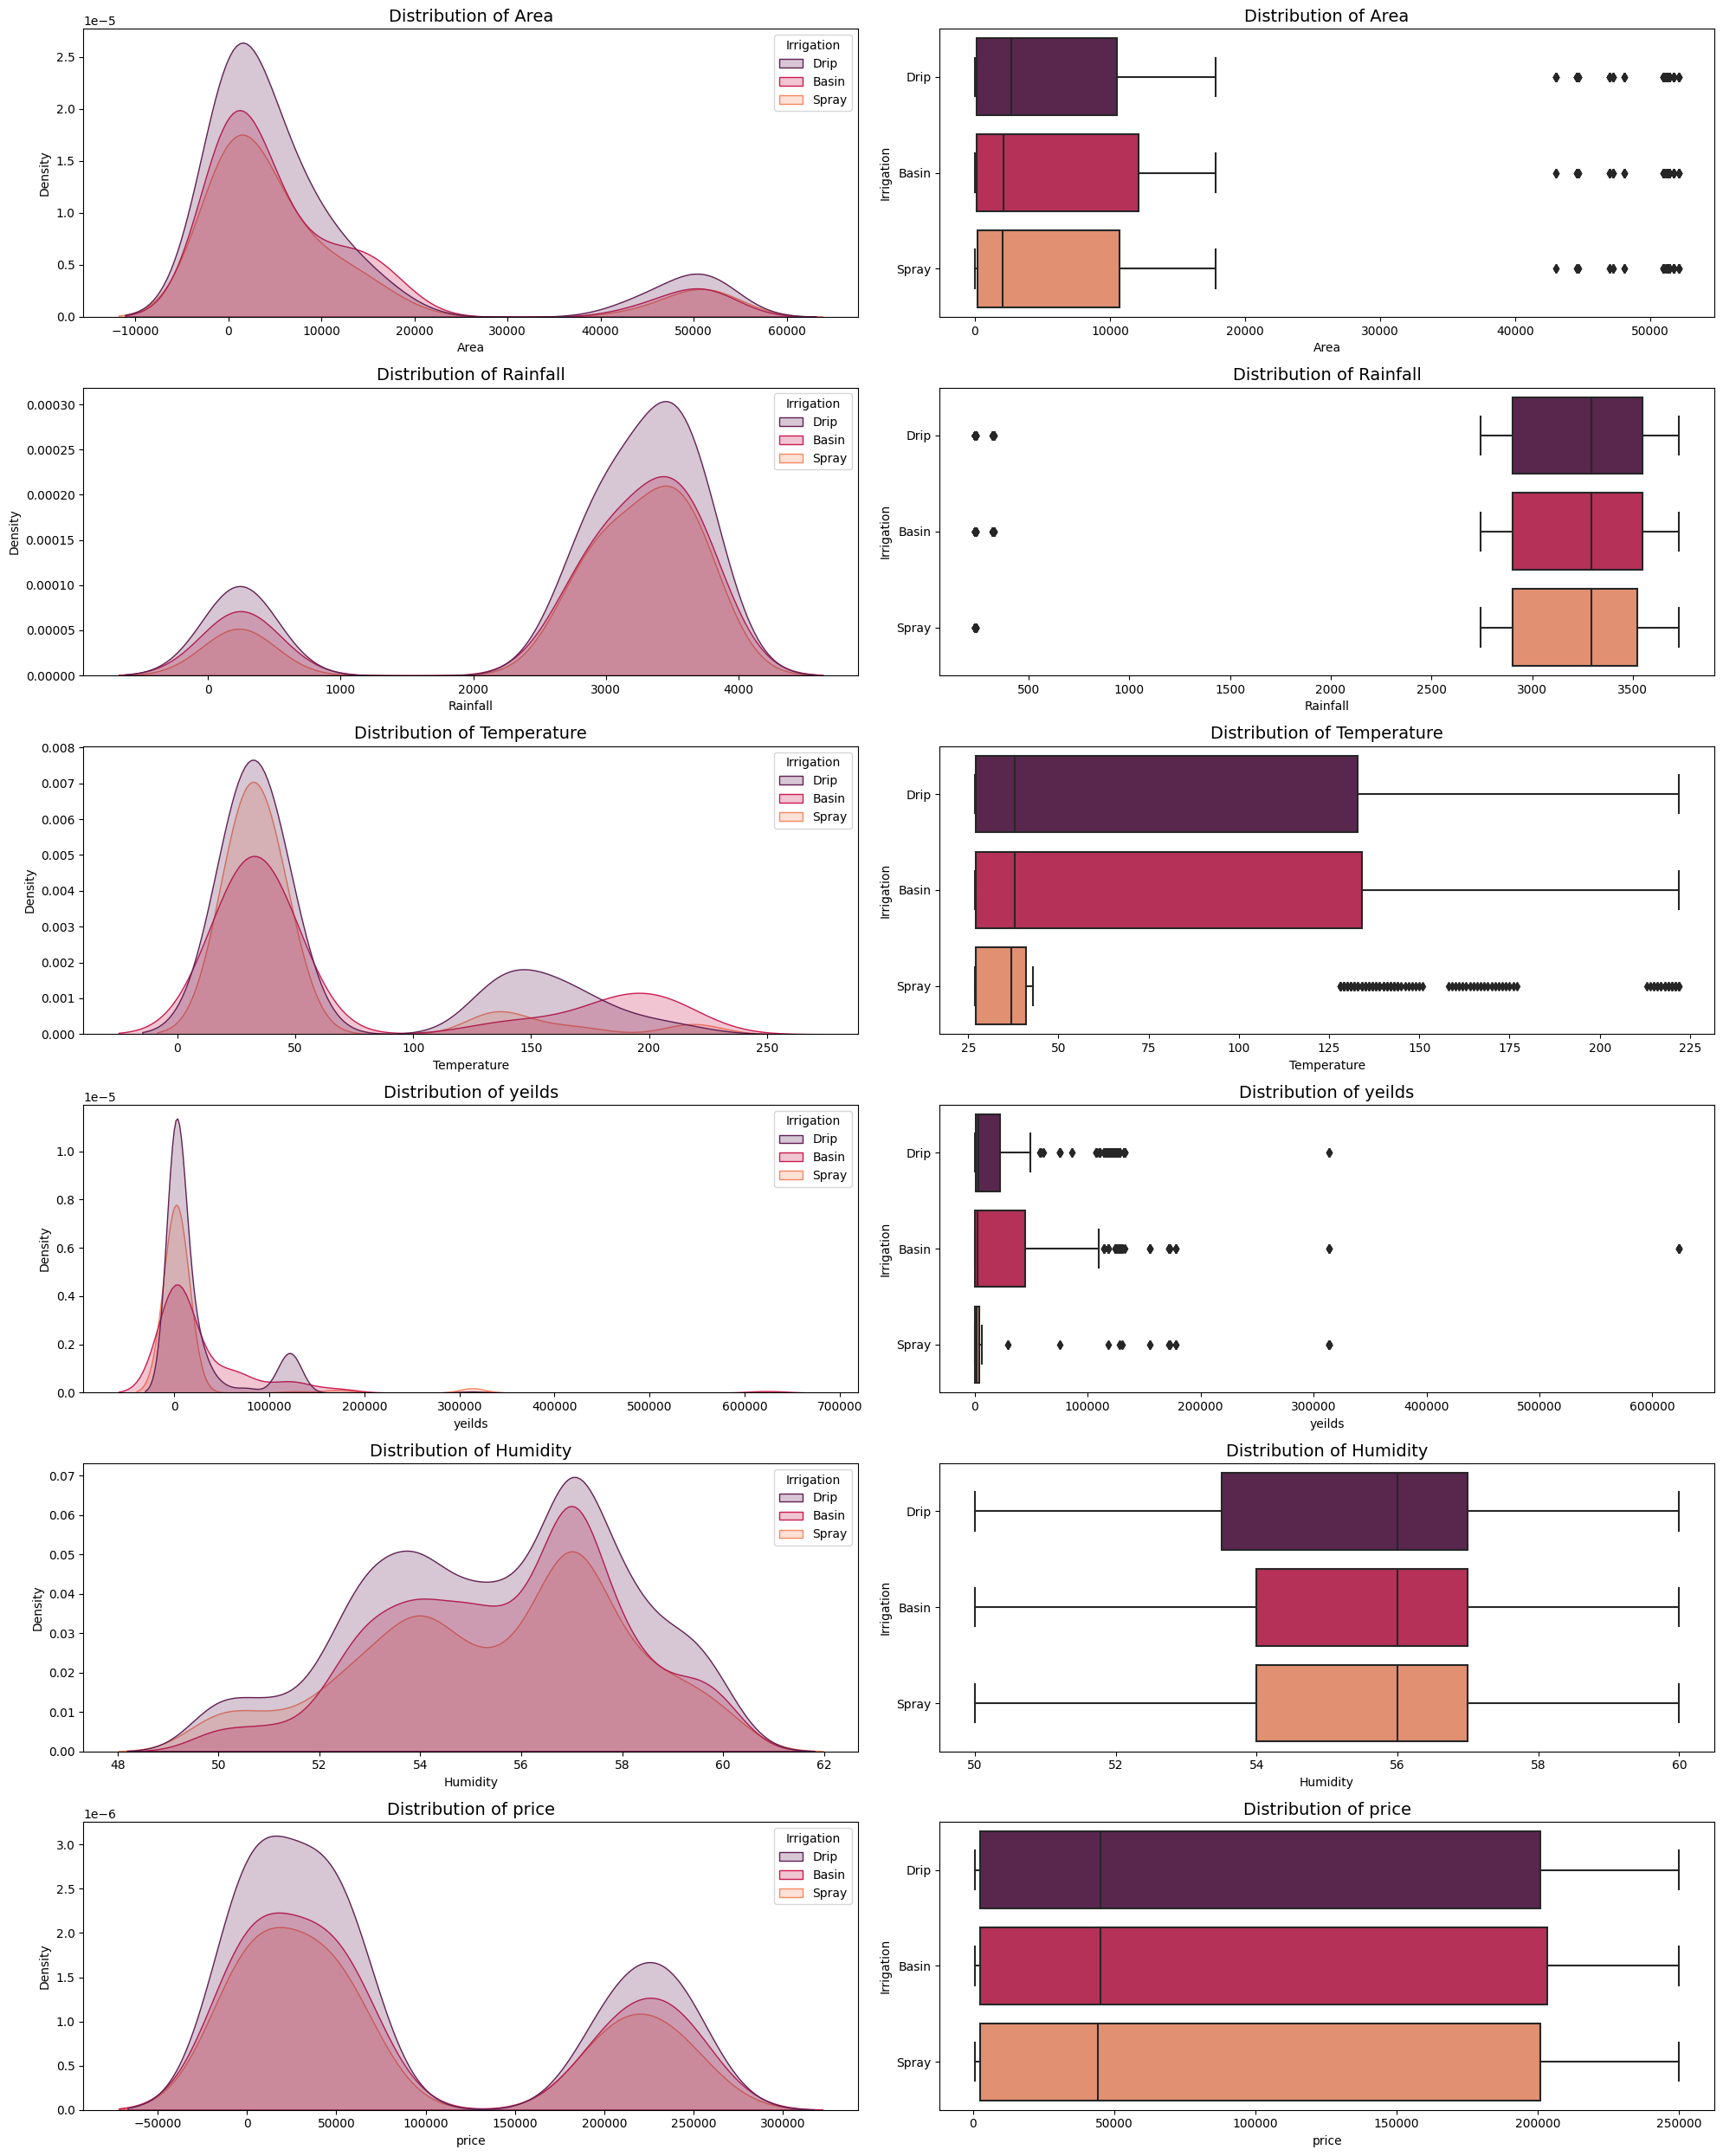

In [21]:
num_columns = ['Area', 'Rainfall', 'Temperature', 'yeilds', 'Humidity','price']
fig, axes = plt.subplots(6, 2, figsize=(20, 25))

# Loop through numerical columns
for idx, col in enumerate(num_columns):

    # Row index
    row = idx  # This is equal to the loop index for each variable

    # KDE plot (first column in the row)
    sns.kdeplot(data=df1, x=col, hue="Irrigation", fill=True, palette="rocket", ax=axes[row, 0])

    axes[row, 0].set_title(f"Distribution of {col}", fontsize=14)

    # Boxplot (second column in the row)
    sns.boxplot(data=df1, x=col, y='Irrigation', palette='rocket', orient='h',ax=axes[row, 1])
    axes[row, 1].set_title(f"Distribution of {col}", fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## 3.9. Scatterplots of numerical values with each other

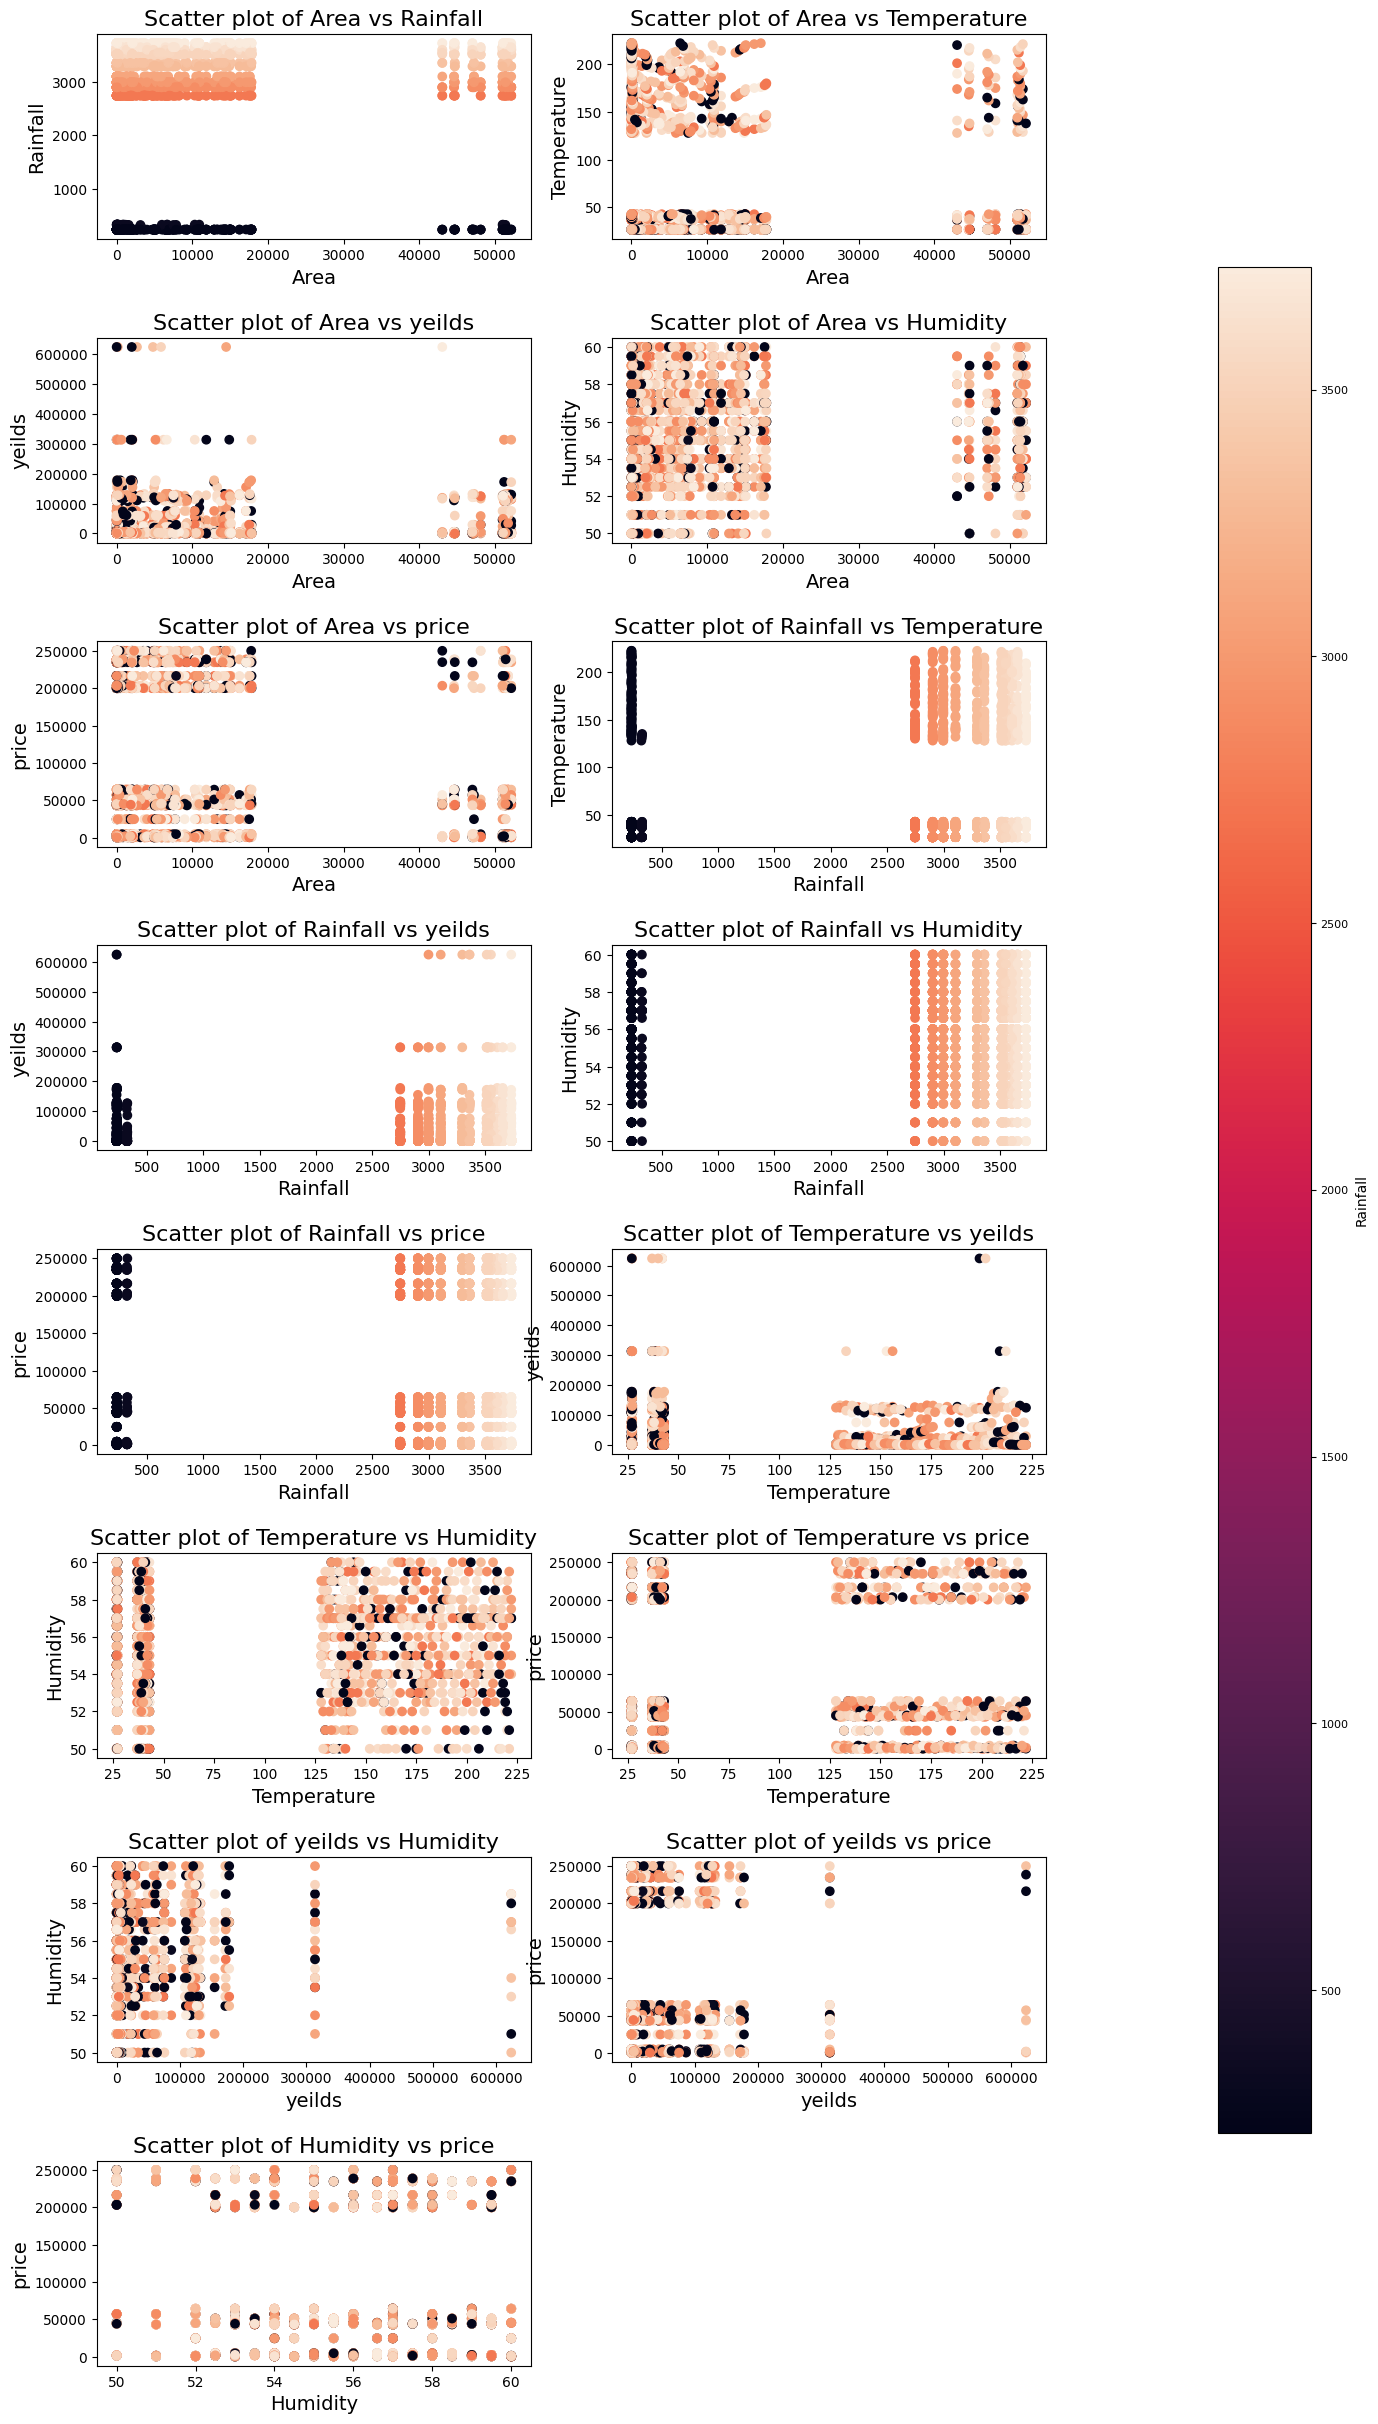

In [22]:
num_columns = ['Area', 'Rainfall', 'Temperature', 'yeilds', 'Humidity', 'price']

# Initialize subplots (8 rows, 2 columns)
fig, axes = plt.subplots(8, 2, figsize=(15, 25))  # Adjust size as needed
fig.tight_layout(pad=5)  # Adjust padding between plots

# Flatten axes for easy iteration
axes = axes.flatten()

# Initialize subplot index
plot_idx = 0

# Loop through unique pairs of columns (without repetition)
for i, j in itertools.combinations(num_columns, 2):
    ax = axes[plot_idx]  # Access flattened axes

    # Scatter plot on the respective subplot
    scatter = ax.scatter(df1[i], df1[j], c=df1['Rainfall'], cmap='rocket')

    # Set labels and title with larger font size
    ax.set_xlabel(i, fontsize=14)
    ax.set_ylabel(j, fontsize=14)
    ax.set_title(f'Scatter plot of {i} vs {j}', fontsize=16)

    plot_idx += 1  # Increment the plot index

# Add a colorbar to the right of the plots
cbar = plt.colorbar(scatter, ax=axes, orientation='vertical', label='Rainfall', shrink=0.8)

# Make the colorbar smaller (reduce font size and size of the colorbar itself)
cbar.ax.tick_params(labelsize=8)  # Smaller font size for ticks

# Adjust the layout to leave more space on the right for the colorbar
plt.subplots_adjust(right=0.7)  # Reduce the space taken by subplots


# Hide unused subplots
for idx in range(plot_idx, len(axes)):
    axes[idx].axis('off')

# Show the plot
plt.show()

## 3.10. Correlation matrix of numerical variables

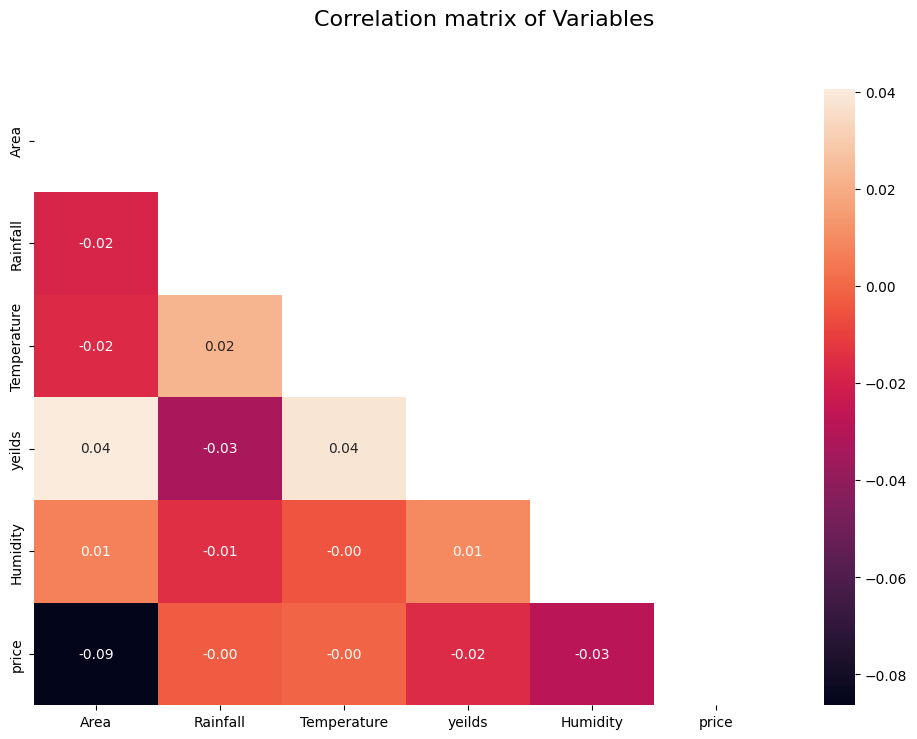

In [23]:
matrix = df1[['Area', 'Rainfall', 'Temperature', 'yeilds', 'Humidity', 'price']].corr()

# Create a figure with a specific size

plt.figure(figsize=(12, 8))

# Plot the heatmap with custom font sizes

sns.heatmap(matrix, cmap='rocket', fmt='.2f', mask=np.triu(matrix), annot=True, annot_kws={"size": 10})  # Control annotation font size

# Add a title with custom font size
plt.suptitle("Correlation matrix of Variables", fontsize=16)

# Control the font size of the axis tick labels
plt.tick_params(axis='both', which='major', labelsize=10)  # Adjust axis tick font size

# Show the plot
plt.show()